# `# Web_Scrapping` :  **Domain -- Hotel_price analysis.**

# `(1). Problem_Statment` : -->

## Our aim is to analysis/find out best oyo hotels in India among all of the metro cities on the  basics of their prices & facilities provided.

## Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [3]:
url='https://www.oyorooms.com/search?location=Delhi%2C%20India&city=Delhi&searchType=city&coupon=&checkin=13%2F11%2F2022&checkout=14%2F11%2F2022&roomConfig%5B%5D=2&showSearchElements=false&guests=2&rooms=1&countryName=India&country=india&filters%5Bcity_id%5D=2'

In [5]:
page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'})
print(page.status_code)       #page = requests.get(url)

200


In [6]:
pagecontent = page.text
pagecontent

'\n    <!doctype html>\n    <html lang="en" dir=ltr>\n    <head>\n      <meta charSet="utf-8" />\n      <meta httpEquiv="x-ua-compatible" content="ie=edge; chrome=1" />\n      <meta name="google-site-verification" content="lCkLu-7S0Eb5LOgDgmoWxSWzbopNfzKW01ZEe3ldsOc" />\n      <script type="text/javascript">\n      \twindow.renderingSource=\'server\'\n        var host = window.location.hostname;\n        if (!String.prototype.endsWith) {\n\t        String.prototype.endsWith = function(search, this_len) {\n\t\t        if (this_len === undefined || this_len > this.length) {\n\t\t\t        this_len = this.length;\n\t\t        }\n\t      \t  return this.substring(this_len - search.length, this_len) === search;\n\t        };\n        }\n        if (! (host.endsWith("oyorooms.com") || host.endsWith("oyorooms.ms") || host.endsWith("oyohotels.co.jp") || host.endsWith("hotelesoyo.com") || host.endsWith("oyohotels.com") || host.endsWith("belvilla.co.in") || host.endsWith("oyorooms.io")) && host.

In [7]:
soup = BeautifulSoup(pagecontent)
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge; chrome=1" httpequiv="x-ua-compatible"/>
<meta content="lCkLu-7S0Eb5LOgDgmoWxSWzbopNfzKW01ZEe3ldsOc" name="google-site-verification"/>
<script type="text/javascript">
      	window.renderingSource='server'
        var host = window.location.hostname;
        if (!String.prototype.endsWith) {
	        String.prototype.endsWith = function(search, this_len) {
		        if (this_len === undefined || this_len > this.length) {
			        this_len = this.length;
		        }
	      	  return this.substring(this_len - search.length, this_len) === search;
	        };
        }
        if (! (host.endsWith("oyorooms.com") || host.endsWith("oyorooms.ms") || host.endsWith("oyohotels.co.jp") || host.endsWith("hotelesoyo.com") || host.endsWith("oyohotels.com") || host.endsWith("belvilla.co.in") || host.endsWith("oyorooms.io")) && host.indexOf('localhost') < 0){
          wind

In [10]:
HotelS = []
RatingS = []
ReviweS= []
PriceS = []
DiscountS=[]
Total_PriceS=[]
AmenitieS=[]
LocationS=[]
Information=[]


for i in range(1,38):
    start_time=time.time()
    url = 'https://www.oyorooms.com/search?location=Delhi%2C%20India&city=Delhi&searchType=city&coupon=&checkin=13%2F11%2F2022&checkout=14%2F11%2F2022&roomConfig%5B%5D=2&showSearchElements=false&guests=2&rooms=1&countryName=India&country=india&filters%5Bcity_id%5D=2&page={}'.format(i)
    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'})
    pagecontent=page.text
    soup = BeautifulSoup(page.text)
    
    for x in soup.find_all('div', attrs = {'class': 'oyo-cell--12-col oyo-cell--8-col-tablet oyo-cell--4-col-phone'}):
        
        
        #Hotels
        
        hotel_name = x.find('h3', attrs = {'class': 'listingHotelDescription__hotelName d-textEllipsis'})
        
        if hotel_name is None:
            HotelS.append(np.NaN)
        else:
            HotelS.append(hotel_name.text)
            
        
        #Ratings
        
        Ratings = x.find('span', attrs = {'class': 'is-fontBold hotelRating__rating hotelRating__rating--verygood hotelRating__rating--clickable'})

        if Ratings is None:
            RatingS.append(np.NaN)
        else:
            RatingS.append(Ratings.text)   
      
        #Reviwes
        
        Reviwes = x.find('span', attrs = {'class': 'hotelRating__ratingSummary'})

        if Reviwes is None:
            
            ReviweS.append(np.NaN)
        else:
            ReviweS.append(Reviwes.text)   

        
        #Price
        
        price = x.find('span',attrs = {'class': 'listingPrice__finalPrice'})
        
        if price is None:
            PriceS.append(np.NaN)
        else:
            PriceS.append(price.text)


        
        #Discounts
        
        Discount_on_price = x.find('span',attrs = {'class': 'listingPrice__percentage'})
        
        if Discount_on_price is None:
            DiscountS.append(np.NaN)
        else:
            DiscountS.append(Discount_on_price.text)
        
        
         #Total_price
            
        Total_price = x.find('span',attrs = {'class': 'listingPrice__slashedPrice d-body-lg'})
        
        if Total_price is None:
            Total_PriceS.append(np.NaN)
        else:
            Total_PriceS.append(Total_price.text)
        
        #Amenities
        
        Amenities = x.find('span', attrs = {'class':'d-body-sm'})
        
        if Amenities is None:
            AmenitieS.append(np.NaN)
        else:
            AmenitieS.append(Amenities.text)
            
            
            
            
        #Location
        
        Location = x.find('div',attrs = {'class': 'd-body-lg listingHotelDescription__hotelAddress'})
        
        if Location is None:
            LocationS.append(np.NaN)
        else:
            LocationS.append(Location.text)
            
            
            
        #Information
        
        Info = x.find('div',attrs = {'class': 'c-1sugwtq'})
        
        if Info is None:
            Information.append(np.NaN)
        else:
            Information.append(Info.text)
            
            
    end_time = time.time()
    print('Page {} completed in {} seconds'. format(i, end_time-start_time))    

Page 1 completed in 7.3162126541137695 seconds
Page 2 completed in 22.21767497062683 seconds
Page 3 completed in 9.580541133880615 seconds
Page 4 completed in 5.037631988525391 seconds
Page 5 completed in 5.910807847976685 seconds
Page 6 completed in 5.444075584411621 seconds
Page 7 completed in 5.356772422790527 seconds
Page 8 completed in 5.023727893829346 seconds
Page 9 completed in 5.819853782653809 seconds
Page 10 completed in 5.976470708847046 seconds
Page 11 completed in 5.470284700393677 seconds
Page 12 completed in 5.904569625854492 seconds
Page 13 completed in 7.940953731536865 seconds
Page 14 completed in 8.139784097671509 seconds
Page 15 completed in 5.954701662063599 seconds
Page 16 completed in 9.539886713027954 seconds
Page 17 completed in 7.82074236869812 seconds
Page 18 completed in 6.735341787338257 seconds
Page 19 completed in 7.39192271232605 seconds
Page 20 completed in 6.805144548416138 seconds
Page 21 completed in 13.319460153579712 seconds
Page 22 completed in 6

In [11]:
print(len(HotelS))
print(len(RatingS))
print(len(PriceS))
print(len(Total_PriceS))
print(len(DiscountS))
print(len(AmenitieS))
print(len(LocationS))
print(len(Information))
print(len(ReviweS))

661
661
661
661
661
661
661
661
661


In [12]:
df1 = pd.DataFrame({'Hotels':HotelS,
                    'Prices':PriceS,
                    'Total_Price':Total_PriceS,
                    'Ratings':RatingS,
                    'Booking_Discounts(%)':DiscountS,
                    'Reviews':ReviweS,
                    'Facilities':AmenitieS,
                    'Address':LocationS,
                    'Informations':Information})
df1

Hotels Prices Total_Price  \
0                   OYO Townhouse 665 Chahal Residency   ₹696       ₹3468   
1                            OYO 702697 Hotel SK Tower   ₹640       ₹2285   
2                    Flagship 701563 The Sky Residency   ₹556       ₹1984   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...   ₹699       ₹2651   
4                           OYO Townhouse 99 Rudra Inn   ₹986       ₹2561   
..                                                 ...    ...         ...   
656                            Townhouse OAK Saltstayz    NaN         NaN   
657                                                         0         NaN   
658                      Townhouse OAK Hotel Greenvill    NaN         NaN   
659                       Townhouse 1139 Jdm Residency    NaN         NaN   
660                    OYO Flagship 703170 Vibe Living    NaN         NaN   

    Ratings Booking_Discounts(%)         Reviews          Facilities  \
0       NaN              79% off   (271 Ratings)          Reception    
1       NaN              71% off    (43 Ratings)         Free Wi-Fi    
2       NaN              71% off             NaN           Elevator    
3      4.0               73% off   (443 Ratings)          Reception    
4       NaN              61% off  (3378 Ratings)         Free Wi-Fi    
..      ...                  ...             ...                 ...   
656     NaN                  NaN   (632 Ratings)   Parking facility    
657     NaN                  NaN             NaN                 NaN   
658     NaN                  NaN    (81 Ratings)   Parking facility    
659     NaN                  NaN   (109 Ratings)           Elevator    
660     NaN                  NaN             NaN             Geyser    

                                       Address  \
0                      Vasant Kunj Marg, Delhi   
1                      Rohini Extension, Delhi   
2                            Param Puri, Delhi   
3                         Sector 43, Faridabad   
4                      Chattarpur Delhi, Delhi   
..                                         ...   
656                         Sector 52, Gurgaon   
657                                              
658                   Anamika Enclave, Gurgaon   
659                           Gurgaon, Gurgaon   
660  Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Hotels                661 non-null    object
 1   Prices                489 non-null    object
 2   Total_Price           488 non-null    object
 3   Ratings               99 non-null     object
 4   Booking_Discounts(%)  488 non-null    object
 5   Reviews               587 non-null    object
 6   Facilities            659 non-null    object
 7   Address               661 non-null    object
 8   Informations          392 non-null    object
dtypes: object(9)
memory usage: 46.6+ KB


In [14]:
df1['Prices'] = df1['Prices'].astype(str)
df1['Prices'] = df1['Prices'].apply(lambda x: x.replace('NaN','0000'))
df1['Prices'] = df1['Prices'].apply(lambda x: x.replace('₹',''))
df1['Prices'] = df1['Prices'].astype(float)
df1['Prices'].fillna(df1['Prices'].mean(), inplace = True)

In [19]:
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

    Total_Price Ratings Booking_Discounts(%)         Reviews  \
0         ₹3468     NaN              79% off   (271 Ratings)   
1         ₹2285     NaN              71% off    (43 Ratings)   
2         ₹1984     NaN              71% off             NaN   
3         ₹2651    4.0               73% off   (443 Ratings)   
4         ₹2561     NaN              61% off  (3378 Ratings)   
..          ...     ...                  ...             ...   
656         NaN     NaN                  NaN   (632 Ratings)   
657         NaN     NaN                  NaN             NaN   
658         NaN     NaN                  NaN    (81 Ratings)   
659         NaN     NaN                  NaN   (109 Ratings)   
660         NaN     NaN                  NaN             NaN   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [20]:
df1['Total_Price'] = df1['Total_Price'].astype(str)
df1['Total_Price'] = df1['Total_Price'].apply(lambda x: x.replace('NaN','0000'))
df1['Total_Price'] = df1['Total_Price'].apply(lambda x: x.replace('₹',''))
df1['Total_Price'] = df1['Total_Price'].astype(float)
df1['Total_Price'].fillna(df1['Total_Price'].mean(), inplace = True)

In [25]:
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price Ratings Booking_Discounts(%)         Reviews  \
0    3468.000000     NaN              79% off   (271 Ratings)   
1    2285.000000     NaN              71% off    (43 Ratings)   
2    1984.000000     NaN              71% off             NaN   
3    2651.000000    4.0               73% off   (443 Ratings)   
4    2561.000000     NaN              61% off  (3378 Ratings)   
..           ...     ...                  ...             ...   
656  3216.346311     NaN                  NaN   (632 Ratings)   
657  3216.346311     NaN                  NaN             NaN   
658  3216.346311     NaN                  NaN    (81 Ratings)   
659  3216.346311     NaN                  NaN   (109 Ratings)   
660  3216.346311     NaN                  NaN             NaN   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [26]:
df1['Ratings'] = df1['Ratings'].astype(str)
df1['Ratings'] = df1['Ratings'].apply(lambda x: x.replace('NaN','0000'))
df1['Ratings'] = df1['Ratings'].astype(float)
df1['Ratings'].fillna(df1['Ratings'].mean(), inplace = True)

In [30]:
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings Booking_Discounts(%)         Reviews  \
0    3468.000000  4.170707              79% off   (271 Ratings)   
1    2285.000000  4.170707              71% off    (43 Ratings)   
2    1984.000000  4.170707              71% off             NaN   
3    2651.000000  4.000000              73% off   (443 Ratings)   
4    2561.000000  4.170707              61% off  (3378 Ratings)   
..           ...       ...                  ...             ...   
656  3216.346311  4.170707                  NaN   (632 Ratings)   
657  3216.346311  4.170707                  NaN             NaN   
658  3216.346311  4.170707                  NaN    (81 Ratings)   
659  3216.346311  4.170707                  NaN   (109 Ratings)   
660  3216.346311  4.170707                  NaN             NaN   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [31]:
df1['Booking_Discounts(%)'] = df1['Booking_Discounts(%)'].str.replace('\D+','')
df1['Booking_Discounts(%)']=df1['Booking_Discounts(%)'].astype(float)
df1['Booking_Discounts(%)'].fillna(df1['Booking_Discounts(%)'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7344\2563500470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Booking_Discounts(%)'] = df1['Booking_Discounts(%)'].str.replace('\D+','')


In [34]:
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings  Booking_Discounts(%)         Reviews  \
0    3468.000000  4.170707             79.000000   (271 Ratings)   
1    2285.000000  4.170707             71.000000    (43 Ratings)   
2    1984.000000  4.170707             71.000000             NaN   
3    2651.000000  4.000000             73.000000   (443 Ratings)   
4    2561.000000  4.170707             61.000000  (3378 Ratings)   
..           ...       ...                   ...             ...   
656  3216.346311  4.170707             68.991803   (632 Ratings)   
657  3216.346311  4.170707             68.991803             NaN   
658  3216.346311  4.170707             68.991803    (81 Ratings)   
659  3216.346311  4.170707             68.991803   (109 Ratings)   
660  3216.346311  4.170707             68.991803             NaN   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [35]:
df1['Reviews'] = df1['Reviews'].str.replace('\D+','')
df1['Reviews']=df1['Reviews'].astype(float)
df1['Reviews'].fillna(df1['Reviews'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7344\629340285.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Reviews'] = df1['Reviews'].str.replace('\D+','')


In [38]:
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings  Booking_Discounts(%)      Reviews  \
0    3468.000000  4.170707             79.000000   271.000000   
1    2285.000000  4.170707             71.000000    43.000000   
2    1984.000000  4.170707             71.000000   560.081772   
3    2651.000000  4.000000             73.000000   443.000000   
4    2561.000000  4.170707             61.000000  3378.000000   
..           ...       ...                   ...          ...   
656  3216.346311  4.170707             68.991803   632.000000   
657  3216.346311  4.170707             68.991803   560.081772   
658  3216.346311  4.170707             68.991803    81.000000   
659  3216.346311  4.170707             68.991803   109.000000   
660  3216.346311  4.170707             68.991803   560.081772   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations  
0                    Erratic check-in experience  
1    22 people booked this hotel in last 6 hours  
2               8 people booked this hotel today  
3             All staff vaccinated with 1st dose  
4             All staff vaccinated with 1st dose  
..                                           ...  
656  1k+ people booked this OYO in last 6 months  
657                                          NaN  
658                                          NaN  
659   7 people booked this hotel in last 6 hours  
660                                          NaN  

[661 rows x 9 columns]

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotels                661 non-null    object 
 1   Prices                661 non-null    float64
 2   Total_Price           661 non-null    float64
 3   Ratings               661 non-null    float64
 4   Booking_Discounts(%)  661 non-null    float64
 5   Reviews               661 non-null    float64
 6   Facilities            659 non-null    object 
 7   Address               661 non-null    object 
 8   Informations          392 non-null    object 
dtypes: float64(5), object(4)
memory usage: 46.6+ KB


In [40]:
df1["City_Name"] = df1['Address'].apply(lambda x: x.split(',')[-1])
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings  Booking_Discounts(%)      Reviews  \
0    3468.000000  4.170707             79.000000   271.000000   
1    2285.000000  4.170707             71.000000    43.000000   
2    1984.000000  4.170707             71.000000   560.081772   
3    2651.000000  4.000000             73.000000   443.000000   
4    2561.000000  4.170707             61.000000  3378.000000   
..           ...       ...                   ...          ...   
656  3216.346311  4.170707             68.991803   632.000000   
657  3216.346311  4.170707             68.991803   560.081772   
658  3216.346311  4.170707             68.991803    81.000000   
659  3216.346311  4.170707             68.991803   109.000000   
660  3216.346311  4.170707             68.991803   560.081772   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations   City_Name  
0                    Erratic check-in experience       Delhi  
1    22 people booked this hotel in last 6 hours       Delhi  
2               8 people booked this hotel today       Delhi  
3             All staff vaccinated with 1st dose   Faridabad  
4             All staff vaccinated with 1st dose       Delhi  
..                                           ...         ...  
656  1k+ people booked this OYO in last 6 months     Gurgaon  
657                                          NaN              
658                                          NaN     Gurgaon  
659   7 people booked this hotel in last 6 hours     Gurgaon  
660                                          NaN     Gurgaon  

[661 rows x 10 columns]

In [41]:
df1['Address']

0                        Vasant Kunj Marg, Delhi
1                        Rohini Extension, Delhi
2                              Param Puri, Delhi
3                           Sector 43, Faridabad
4                        Chattarpur Delhi, Delhi
                         ...                    
656                           Sector 52, Gurgaon
657                                             
658                     Anamika Enclave, Gurgaon
659                             Gurgaon, Gurgaon
660    Omega hotel Gurgaon HaryanaIndia, Gurgaon
Name: Address, Length: 661, dtype: object

In [42]:
city = []
for i in df1['Address']:
    city.append(i.split())
city    

[['Vasant', 'Kunj', 'Marg,', 'Delhi'],
 ['Rohini', 'Extension,', 'Delhi'],
 ['Param', 'Puri,', 'Delhi'],
 ['Sector', '43,', 'Faridabad'],
 ['Chattarpur', 'Delhi,', 'Delhi'],
 ['Gzb,', 'Ghaziabad'],
 ['SBI', 'Bank', 'street,', 'Delhi'],
 ['Near', 'Shiv', 'Nadar', 'School,', 'DLF', 'Phase', '1,', 'Gurgaon'],
 ['K',
  '33',
  'Road',
  'No.2',
  'mahipalpur',
  'block',
  'b',
  'new',
  'delhi',
  '110037'],
 ['New', 'Delhi,', 'Delhi', 'Transit'],
 ['New', 'Delhi,', 'Delhi', 'Transit'],
 ['Dwarka,', 'Delhi'],
 ['94', 'P', 'BLOCK,', 'SECTOR', '41', 'part', '1'],
 ['Mahipalpur,', 'Delhi', 'Transit'],
 ['Near', 'One', 'Mall,', 'Nehar', 'Road,', 'Ghaziabad'],
 ['North', 'Delhi,', 'Delhi'],
 ['Dwarka', 'Sector', '9,', 'Delhi'],
 ['Village', 'Ghasola,', 'Gurgaon'],
 ['Rohini,', 'Delhi'],
 ['Near', 'Artemis', 'Hospital,', 'Gurgaon'],
 ['Near', 'Jindal', 'Public', 'School,', 'Dabri,', 'Delhi'],
 ['Near', 'Dabri', 'More,', 'Mahavir', 'Enclave,', 'Delhi'],
 ['Near', 'Icici', 'Banknullnull,', 'Delh

In [46]:
City = []
for i in city:
    if i == "Delhi":
        City.append(i)
    else:
        City.append("Delhi")
City        

['Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',


In [47]:
df1['City_Name']=City
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                       0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings  Booking_Discounts(%)      Reviews  \
0    3468.000000  4.170707             79.000000   271.000000   
1    2285.000000  4.170707             71.000000    43.000000   
2    1984.000000  4.170707             71.000000   560.081772   
3    2651.000000  4.000000             73.000000   443.000000   
4    2561.000000  4.170707             61.000000  3378.000000   
..           ...       ...                   ...          ...   
656  3216.346311  4.170707             68.991803   632.000000   
657  3216.346311  4.170707             68.991803   560.081772   
658  3216.346311  4.170707             68.991803    81.000000   
659  3216.346311  4.170707             68.991803   109.000000   
660  3216.346311  4.170707             68.991803   560.081772   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                              
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations City_Name  
0                    Erratic check-in experience     Delhi  
1    22 people booked this hotel in last 6 hours     Delhi  
2               8 people booked this hotel today     Delhi  
3             All staff vaccinated with 1st dose     Delhi  
4             All staff vaccinated with 1st dose     Delhi  
..                                           ...       ...  
656  1k+ people booked this OYO in last 6 months     Delhi  
657                                          NaN     Delhi  
658                                          NaN     Delhi  
659   7 people booked this hotel in last 6 hours     Delhi  
660                                          NaN     Delhi  

[661 rows x 10 columns]

In [48]:
df1.to_csv('Oyo Hotels Delhi.csv',index=False)

In [4]:
df1 = pd.read_csv('Oyo Hotels Delhi.csv')
df1

Hotels      Prices  \
0                   OYO Townhouse 665 Chahal Residency  696.000000   
1                            OYO 702697 Hotel SK Tower  640.000000   
2                    Flagship 701563 The Sky Residency  556.000000   
3    Flagship 77174 Oyo Flagship Greenfield Colony ...  699.000000   
4                           OYO Townhouse 99 Rudra Inn  986.000000   
..                                                 ...         ...   
656                            Townhouse OAK Saltstayz  978.235174   
657                                                NaN    0.000000   
658                      Townhouse OAK Hotel Greenvill  978.235174   
659                       Townhouse 1139 Jdm Residency  978.235174   
660                    OYO Flagship 703170 Vibe Living  978.235174   

     Total_Price   Ratings  Booking_Discounts(%)      Reviews  \
0    3468.000000  4.170707             79.000000   271.000000   
1    2285.000000  4.170707             71.000000    43.000000   
2    1984.000000  4.170707             71.000000   560.081772   
3    2651.000000  4.000000             73.000000   443.000000   
4    2561.000000  4.170707             61.000000  3378.000000   
..           ...       ...                   ...          ...   
656  3216.346311  4.170707             68.991803   632.000000   
657  3216.346311  4.170707             68.991803   560.081772   
658  3216.346311  4.170707             68.991803    81.000000   
659  3216.346311  4.170707             68.991803   109.000000   
660  3216.346311  4.170707             68.991803   560.081772   

             Facilities                                    Address  \
0            Reception                     Vasant Kunj Marg, Delhi   
1           Free Wi-Fi                     Rohini Extension, Delhi   
2             Elevator                           Param Puri, Delhi   
3            Reception                        Sector 43, Faridabad   
4           Free Wi-Fi                     Chattarpur Delhi, Delhi   
..                  ...                                        ...   
656   Parking facility                          Sector 52, Gurgaon   
657                 NaN                                        NaN   
658   Parking facility                    Anamika Enclave, Gurgaon   
659           Elevator                            Gurgaon, Gurgaon   
660             Geyser   Omega hotel Gurgaon HaryanaIndia, Gurgaon   

                                    Informations City_Name  
0                    Erratic check-in experience     Delhi  
1    22 people booked this hotel in last 6 hours     Delhi  
2               8 people booked this hotel today     Delhi  
3             All staff vaccinated with 1st dose     Delhi  
4             All staff vaccinated with 1st dose     Delhi  
..                                           ...       ...  
656  1k+ people booked this OYO in last 6 months     Delhi  
657                                          NaN     Delhi  
658                                          NaN     Delhi  
659   7 people booked this hotel in last 6 hours     Delhi  
660                                          NaN     Delhi  

[661 rows x 10 columns]

In [5]:
df0 = pd.read_csv('Oyo Hotels Hyderabad.csv')
df1 = pd.read_csv('Oyo Hotels Delhi.csv')
df2 = pd.read_csv('Oyo Hotels Bangalore.csv')
df3 = pd.read_csv('Oyo Hotels Chennai.csv')
df4 = pd.read_csv('Oyo Hotels Kolkata.csv')
df5 = pd.read_csv('Oyo Hotels Lucknow.csv')

frames = [df0, df1, df2, df3, df4, df5]
Hotels_oyo = pd.concat(frames)

In [6]:
Hotels_oyo

Hotels       Prices  Total_Price  \
0         Townhouse OAK Hotel Belsons Taj Mahal  1793.000000  6404.000000   
1              Capital O 86948 Hotel Sai Balaji  1040.000000  2972.000000   
2    Flagship 76655 Goldhorn Hotels Mehdipatnam  1595.000000  5697.000000   
3                        OYO 70857 Dream Suites  1474.000000  5264.000000   
4     Capital O 700516 S V Residency Nalagandla   732.000000  2614.000000   
..                                          ...          ...          ...   
208                OYO 85551 Hotel Rudra Palace   854.826531  2866.515306   
209                  Flagship 79156 Hotel Tokyo   854.826531  2866.515306   
210        Flagship 92692 Star Stay Guest House   854.826531  2866.515306   
211       Capital O 84117 The Diamond Night Inn   854.826531  2866.515306   
212                OYO 45546 Woodstock Homestay   854.826531  2866.515306   

      Ratings  Booking_Discounts(%)  Reviews          Facilities  \
0    4.176812             72.000000    189.0     Doctor on call    
1    4.200000             65.000000    987.0          Reception    
2    4.100000             72.000000   1915.0        Living Room    
3    4.176812             72.000000   1414.0          Reception    
4    4.176812             72.000000     73.0     Doctor on call    
..        ...                   ...      ...                 ...   
208  4.188000             69.382653    542.0   Parking facility    
209  4.300000             69.382653    452.0     Doctor on call    
210  4.188000             69.382653    165.0   Parking facility    
211  4.188000             69.382653    287.0     Doctor on call    
212  4.188000             69.382653     65.0          Reception    

                                               Address  \
0      Near Swapnalok Complex, Patny Centre, Hyderabad   
1          Rajendra Nagar Suncity Hyderabad, Hyderabad   
2                               Mehdipatnam, Hyderabad   
3       Near kphb metro station, Kukatpally, Hyderabad   
4                                Nalagandla, Hyderabad   
..                                                 ...   
208                                    226023, Lucknow   
209  1/1000 Vinay Khand (patrakarpuram) Near Malik ...   
210  Star Tower Aliganj Opp Kendriya Bhawan Lucknow...   
211                               Gomti Nagar, Lucknow   
212      Near Tender Hearts School, Mahanagar, Lucknow   

                                     Informations  City_Name  
0     10 people booked this hotel in last 6 hours  Hyderabad  
1     1k+ people booked this OYO in last 6 months  Hyderabad  
2      8 people booked this hotel in last 6 hours  Hyderabad  
3              All staff vaccinated with 1st dose  Hyderabad  
4      7 people booked this hotel in last 6 hours  Hyderabad  
..                                            ...        ...  
208  900+ people booked this OYO in last 6 months    Lucknow  
209            All staff vaccinated with 1st dose    Lucknow  
210                                           NaN    Lucknow  
211    6 people booked this hotel in last 6 hours    Lucknow  
212                                           NaN    Lucknow  

[1832 rows x 10 columns]

In [7]:
Hotels_oyo.to_csv('Oyo Hotels.csv', index= False)

In [8]:
Hotels_oyo = pd.read_csv('Oyo Hotels.csv')
Hotels_oyo

Hotels       Prices  Total_Price  \
0          Townhouse OAK Hotel Belsons Taj Mahal  1793.000000  6404.000000   
1               Capital O 86948 Hotel Sai Balaji  1040.000000  2972.000000   
2     Flagship 76655 Goldhorn Hotels Mehdipatnam  1595.000000  5697.000000   
3                         OYO 70857 Dream Suites  1474.000000  5264.000000   
4      Capital O 700516 S V Residency Nalagandla   732.000000  2614.000000   
...                                          ...          ...          ...   
1827                OYO 85551 Hotel Rudra Palace   854.826531  2866.515306   
1828                  Flagship 79156 Hotel Tokyo   854.826531  2866.515306   
1829        Flagship 92692 Star Stay Guest House   854.826531  2866.515306   
1830       Capital O 84117 The Diamond Night Inn   854.826531  2866.515306   
1831                OYO 45546 Woodstock Homestay   854.826531  2866.515306   

       Ratings  Booking_Discounts(%)  Reviews          Facilities  \
0     4.176812             72.000000    189.0     Doctor on call    
1     4.200000             65.000000    987.0          Reception    
2     4.100000             72.000000   1915.0        Living Room    
3     4.176812             72.000000   1414.0          Reception    
4     4.176812             72.000000     73.0     Doctor on call    
...        ...                   ...      ...                 ...   
1827  4.188000             69.382653    542.0   Parking facility    
1828  4.300000             69.382653    452.0     Doctor on call    
1829  4.188000             69.382653    165.0   Parking facility    
1830  4.188000             69.382653    287.0     Doctor on call    
1831  4.188000             69.382653     65.0          Reception    

                                                Address  \
0       Near Swapnalok Complex, Patny Centre, Hyderabad   
1           Rajendra Nagar Suncity Hyderabad, Hyderabad   
2                                Mehdipatnam, Hyderabad   
3        Near kphb metro station, Kukatpally, Hyderabad   
4                                 Nalagandla, Hyderabad   
...                                                 ...   
1827                                    226023, Lucknow   
1828  1/1000 Vinay Khand (patrakarpuram) Near Malik ...   
1829  Star Tower Aliganj Opp Kendriya Bhawan Lucknow...   
1830                               Gomti Nagar, Lucknow   
1831      Near Tender Hearts School, Mahanagar, Lucknow   

                                      Informations  City_Name  
0      10 people booked this hotel in last 6 hours  Hyderabad  
1      1k+ people booked this OYO in last 6 months  Hyderabad  
2       8 people booked this hotel in last 6 hours  Hyderabad  
3               All staff vaccinated with 1st dose  Hyderabad  
4       7 people booked this hotel in last 6 hours  Hyderabad  
...                                            ...        ...  
1827  900+ people booked this OYO in last 6 months    Lucknow  
1828            All staff vaccinated with 1st dose    Lucknow  
1829                                           NaN    Lucknow  
1830    6 people booked this hotel in last 6 hours    Lucknow  
1831                                           NaN    Lucknow  

[1832 rows x 10 columns]

In [9]:
print(Hotels_oyo.info())

print(Hotels_oyo.shape)

print(Hotels_oyo.columns)

Hotels_oyo['City_Name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotels                1831 non-null   object 
 1   Prices                1832 non-null   float64
 2   Total_Price           1832 non-null   float64
 3   Ratings               1832 non-null   float64
 4   Booking_Discounts(%)  1832 non-null   float64
 5   Reviews               1832 non-null   float64
 6   Facilities            1827 non-null   object 
 7   Address               1831 non-null   object 
 8   Informations          1223 non-null   object 
 9   City_Name             1832 non-null   object 
dtypes: float64(5), object(5)
memory usage: 143.2+ KB
None
(1832, 10)
Index(['Hotels', 'Prices', 'Total_Price', 'Ratings', 'Booking_Discounts(%)',
       'Reviews', 'Facilities', 'Address', 'Informations', 'City_Name'],
      dtype='object')


array(['Hyderabad', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Lucknow'],
      dtype=object)

In [10]:
Hotels_oyo.duplicated().sum()

Hotels_oyo.drop_duplicates(keep='first',inplace=True)

Hotels_oyo.duplicated().sum()

108

0

In [11]:
Hotels_oyo.isnull().sum()

Hotels                    1
Prices                    0
Total_Price               0
Ratings                   0
Booking_Discounts(%)      0
Reviews                   0
Facilities                4
Address                   1
Informations            592
City_Name                 0
dtype: int64

In [12]:
Hotels_oyo.dropna(inplace = True)

Hotels_oyo.isnull().sum()

Hotels                  0
Prices                  0
Total_Price             0
Ratings                 0
Booking_Discounts(%)    0
Reviews                 0
Facilities              0
Address                 0
Informations            0
City_Name               0
dtype: int64

In [13]:
Hotels_oyo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 1830
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotels                1130 non-null   object 
 1   Prices                1130 non-null   float64
 2   Total_Price           1130 non-null   float64
 3   Ratings               1130 non-null   float64
 4   Booking_Discounts(%)  1130 non-null   float64
 5   Reviews               1130 non-null   float64
 6   Facilities            1130 non-null   object 
 7   Address               1130 non-null   object 
 8   Informations          1130 non-null   object 
 9   City_Name             1130 non-null   object 
dtypes: float64(5), object(5)
memory usage: 97.1+ KB


In [14]:
Hotels_oyo.Ratings = Hotels_oyo.Ratings.apply(lambda x: round(x,2) )
Hotels_oyo['Booking_Discounts(%)'] = Hotels_oyo['Booking_Discounts(%)'].apply(lambda x: round(x,2) )

Hotels_oyo.Prices = Hotels_oyo.Prices.apply(lambda x: round(x,2) )
Hotels_oyo.Total_Price = Hotels_oyo.Total_Price.apply(lambda x: round(x,2) )

Hotels_oyo

Hotels   Prices  Total_Price  \
0          Townhouse OAK Hotel Belsons Taj Mahal  1793.00      6404.00   
1               Capital O 86948 Hotel Sai Balaji  1040.00      2972.00   
2     Flagship 76655 Goldhorn Hotels Mehdipatnam  1595.00      5697.00   
3                         OYO 70857 Dream Suites  1474.00      5264.00   
4      Capital O 700516 S V Residency Nalagandla   732.00      2614.00   
...                                          ...      ...          ...   
1825                        OYO 82473 Hotel Meet   854.83      2866.52   
1826    OYO Flagship 702584 Jn Rooms And Banquet   854.83      2866.52   
1827                OYO 85551 Hotel Rudra Palace   854.83      2866.52   
1828                  Flagship 79156 Hotel Tokyo   854.83      2866.52   
1830       Capital O 84117 The Diamond Night Inn   854.83      2866.52   

      Ratings  Booking_Discounts(%)  Reviews          Facilities  \
0        4.18                 72.00    189.0     Doctor on call    
1        4.20                 65.00    987.0          Reception    
2        4.10                 72.00   1915.0        Living Room    
3        4.18                 72.00   1414.0          Reception    
4        4.18                 72.00     73.0     Doctor on call    
...       ...                   ...      ...                 ...   
1825     4.19                 69.38    425.0          Reception    
1826     4.10                 69.38     13.0         Free Wi-Fi    
1827     4.19                 69.38    542.0   Parking facility    
1828     4.30                 69.38    452.0     Doctor on call    
1830     4.19                 69.38    287.0     Doctor on call    

                                                Address  \
0       Near Swapnalok Complex, Patny Centre, Hyderabad   
1           Rajendra Nagar Suncity Hyderabad, Hyderabad   
2                                Mehdipatnam, Hyderabad   
3        Near kphb metro station, Kukatpally, Hyderabad   
4                                 Nalagandla, Hyderabad   
...                                                 ...   
1825  Pandariba Opposite Purana Post Office Charbagh...   
1826     hardoi bypass road alamnagar lucknow , Lucknow   
1827                                    226023, Lucknow   
1828  1/1000 Vinay Khand (patrakarpuram) Near Malik ...   
1830                               Gomti Nagar, Lucknow   

                                      Informations  City_Name  
0      10 people booked this hotel in last 6 hours  Hyderabad  
1      1k+ people booked this OYO in last 6 months  Hyderabad  
2       8 people booked this hotel in last 6 hours  Hyderabad  
3               All staff vaccinated with 1st dose  Hyderabad  
4       7 people booked this hotel in last 6 hours  Hyderabad  
...                                            ...        ...  
1825    7 people booked this hotel in last 6 hours    Lucknow  
1826    6 people booked this hotel in last 6 hours    Lucknow  
1827  900+ people booked this OYO in last 6 months    Lucknow  
1828            All staff vaccinated with 1st dose    Lucknow  
1830    6 people booked this hotel in last 6 hours    Lucknow  

[1130 rows x 10 columns]

In [15]:
Hotels_oyo['City_Name'].value_counts(normalize = True)

Delhi        0.330088
Hyderabad    0.184071
Bangalore    0.175221
Kolkata      0.130088
Chennai      0.094690
Lucknow      0.085841
Name: City_Name, dtype: float64

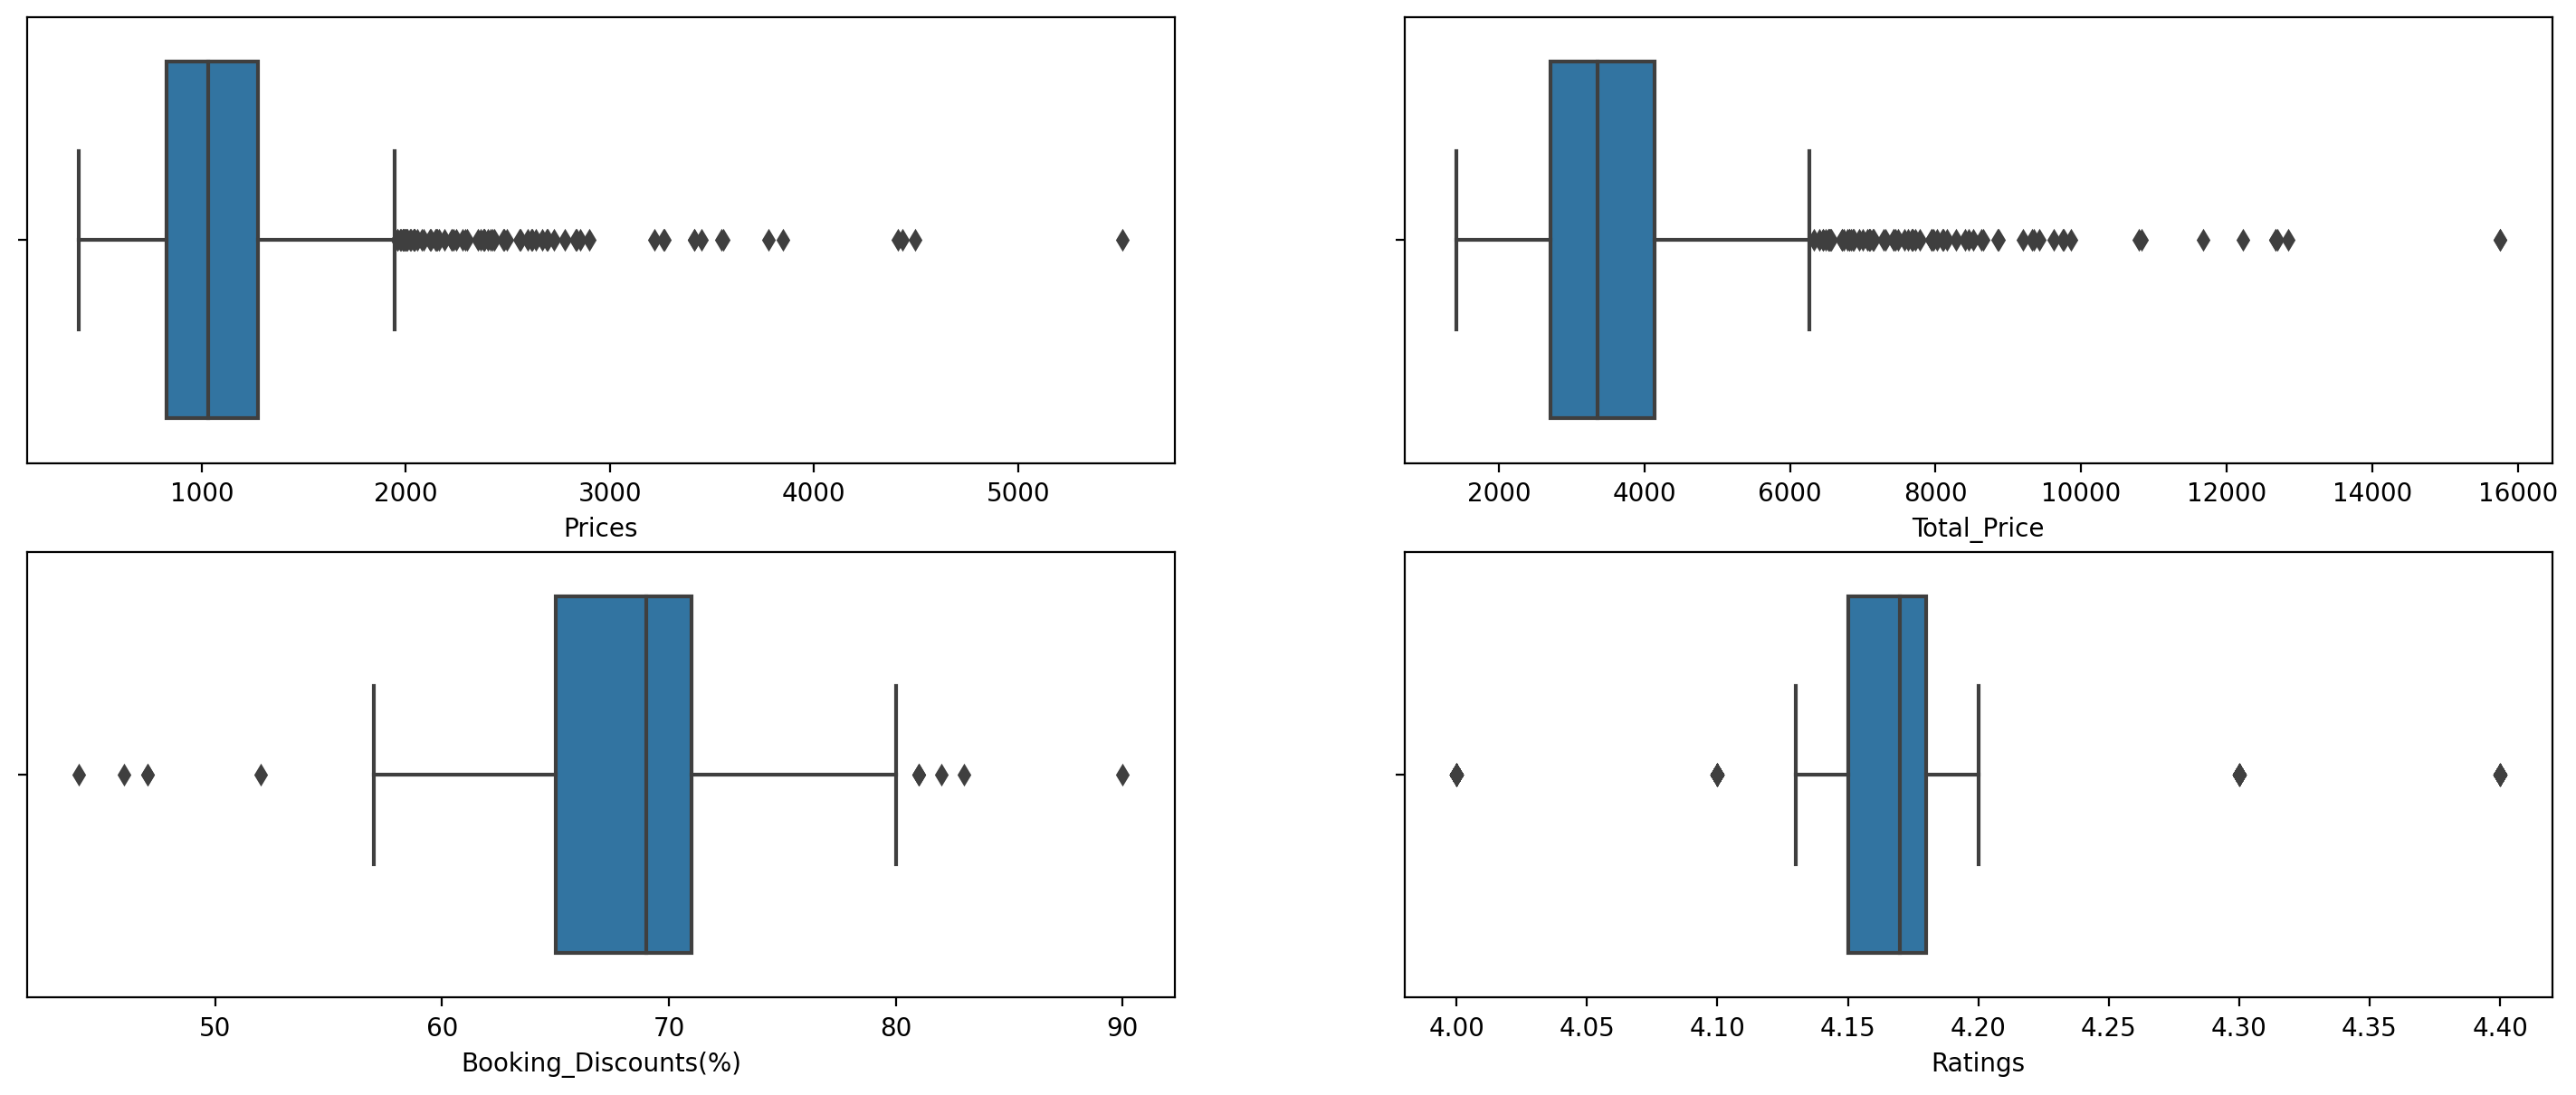

In [16]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=Hotels_oyo,x='Prices')
            
plt.subplot(422)
sns.boxplot(data=Hotels_oyo,x='Total_Price')
            
plt.subplot(423)
sns.boxplot(data=Hotels_oyo,x='Booking_Discounts(%)')
            
plt.subplot(424)
sns.boxplot(data=Hotels_oyo,x='Ratings');

In [17]:
# Removing outliers from "Prices" 
Q1,Q2,Q3 =tuple(Hotels_oyo.Prices.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_oyo.Prices.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

825.75 1031.0 1276.37


1031.0

450.6199999999999
1952.2999999999997
149.82000000000016


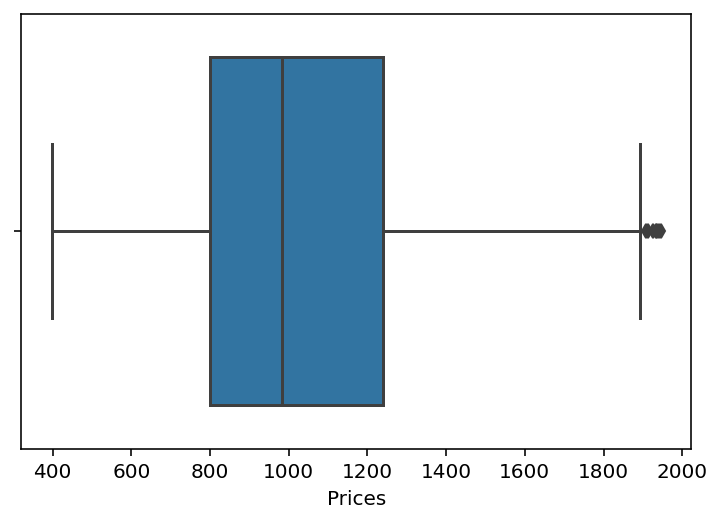

In [18]:
drop_index=Hotels_oyo[(Hotels_oyo.Prices>UL)].index
Hotels_oyo=Hotels_oyo.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_oyo,x='Prices');

In [19]:
# Removing outliers from "Total_price" 
Q1,Q2,Q3 =tuple(Hotels_oyo.Total_Price.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_oyo.Total_Price.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

2648.0 3216.35 4009.5


3216.35

1361.5
6051.75
605.75


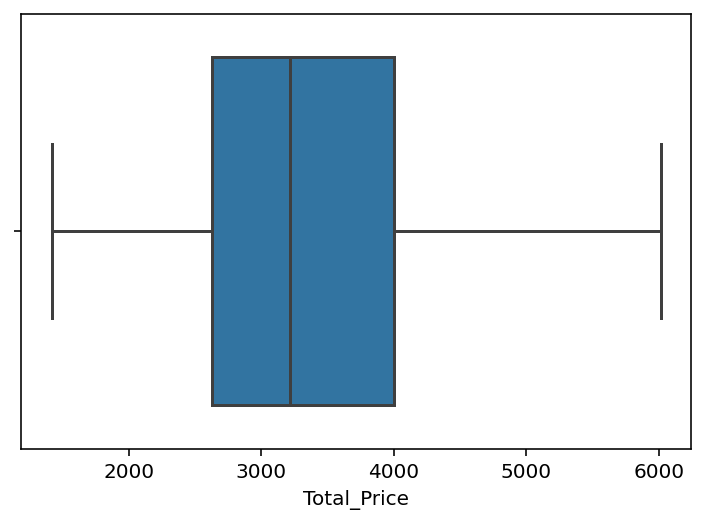

In [20]:
drop_index=Hotels_oyo[(Hotels_oyo.Total_Price>UL)].index
Hotels_oyo=Hotels_oyo.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_oyo,x='Total_Price');

In [21]:
# Removing outliers from "Booking_Discounts(%)" 
Q1,Q2,Q3 =tuple(Hotels_oyo['Booking_Discounts(%)'].quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_oyo['Booking_Discounts(%)'].median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

65.0 68.99 71.0


68.99

6.0
80.0
56.0


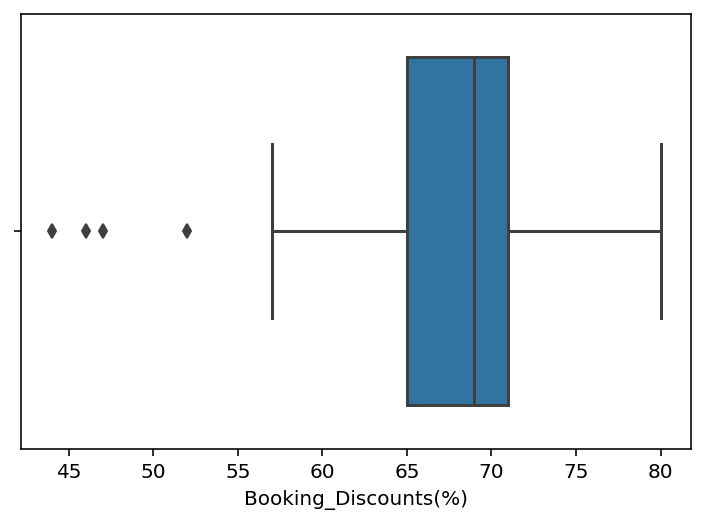

In [22]:
drop_index=Hotels_oyo[(Hotels_oyo['Booking_Discounts(%)']>UL)].index
Hotels_oyo=Hotels_oyo.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_oyo,x='Booking_Discounts(%)');

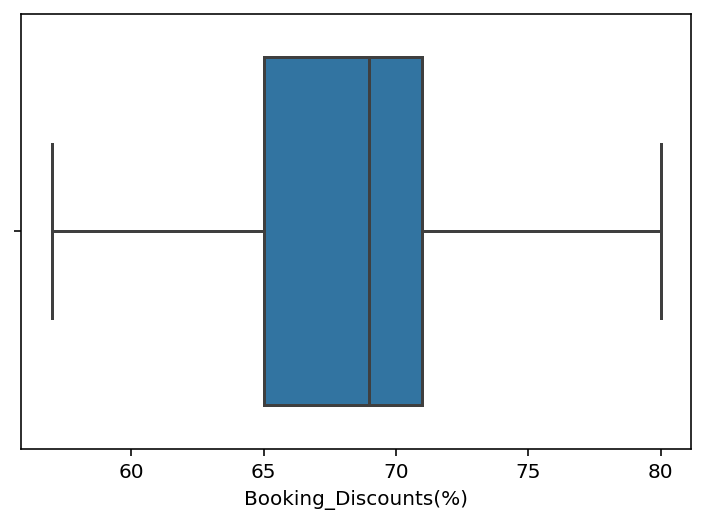

In [23]:
drop_index=Hotels_oyo[(Hotels_oyo['Booking_Discounts(%)']<LL)].index
Hotels_oyo=Hotels_oyo.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_oyo,x='Booking_Discounts(%)');

In [24]:
Hotels_oyo.shape

(1026, 10)

In [25]:
Hotels_oyo.describe()

Prices  Total_Price      Ratings  Booking_Discounts(%)  \
count  1026.000000  1026.000000  1026.000000           1026.000000   
mean   1022.251131  3347.990097     4.164269             68.928304   
std     307.943122   967.240490     0.064152              3.405238   
min     398.000000  1421.000000     4.000000             57.000000   
25%     799.000000  2643.500000     4.150000             65.000000   
50%     978.240000  3216.350000     4.170000             68.990000   
75%    1229.060000  3997.840000     4.180000             71.000000   
max    1945.000000  6011.000000     4.400000             80.000000   

           Reviews  
count  1026.000000  
mean    921.472767  
std     920.545369  
min       3.000000  
25%     311.500000  
50%     634.500000  
75%    1256.250000  
max    8221.000000

In [26]:
Hotels_oyo.corr()

Prices  Total_Price   Ratings  Booking_Discounts(%)  \
Prices                1.000000     0.928260 -0.083085             -0.287786   
Total_Price           0.928260     1.000000 -0.080032              0.068289   
Ratings              -0.083085    -0.080032  1.000000              0.017418   
Booking_Discounts(%) -0.287786     0.068289  0.017418              1.000000   
Reviews               0.244588     0.262389  0.038108              0.016068   

                       Reviews  
Prices                0.244588  
Total_Price           0.262389  
Ratings               0.038108  
Booking_Discounts(%)  0.016068  
Reviews               1.000000

# Data Analysis

## (1) Univariate Analysis

### count plot

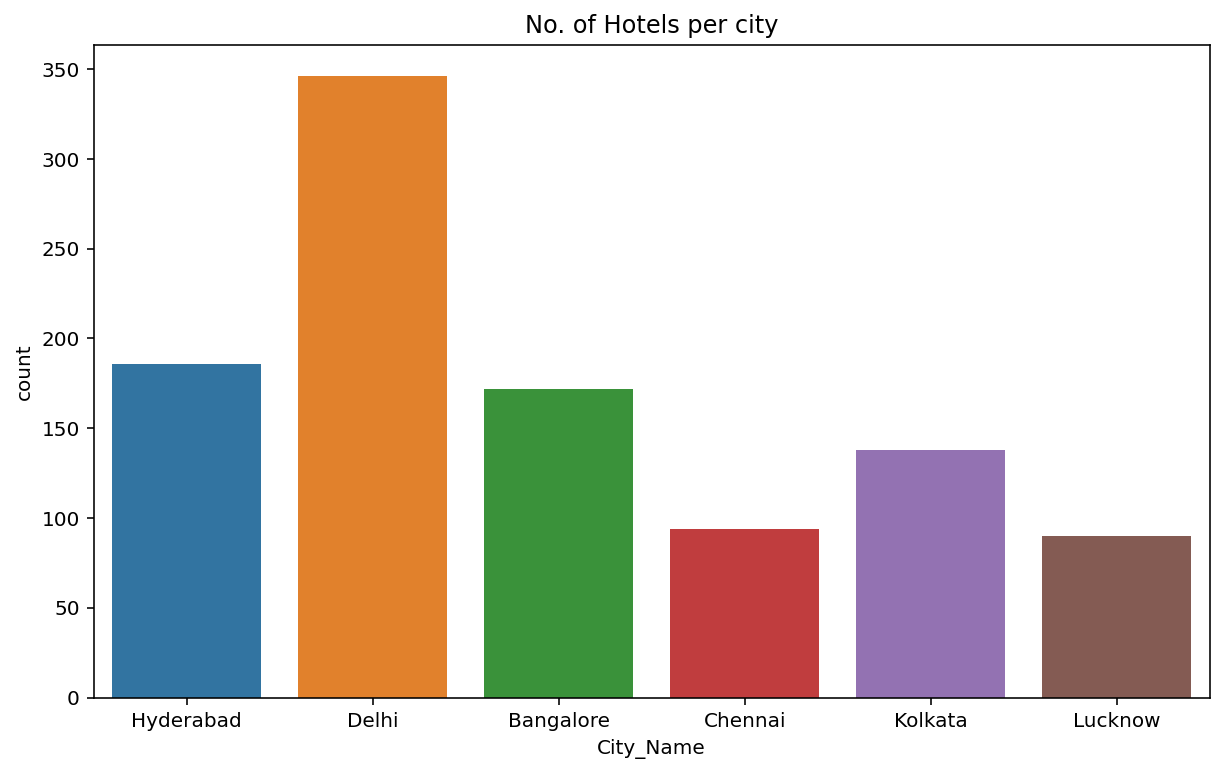

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = "City_Name", data = Hotels_oyo)
plt.title("No. of Hotels per city")
plt.show;

### Box plot

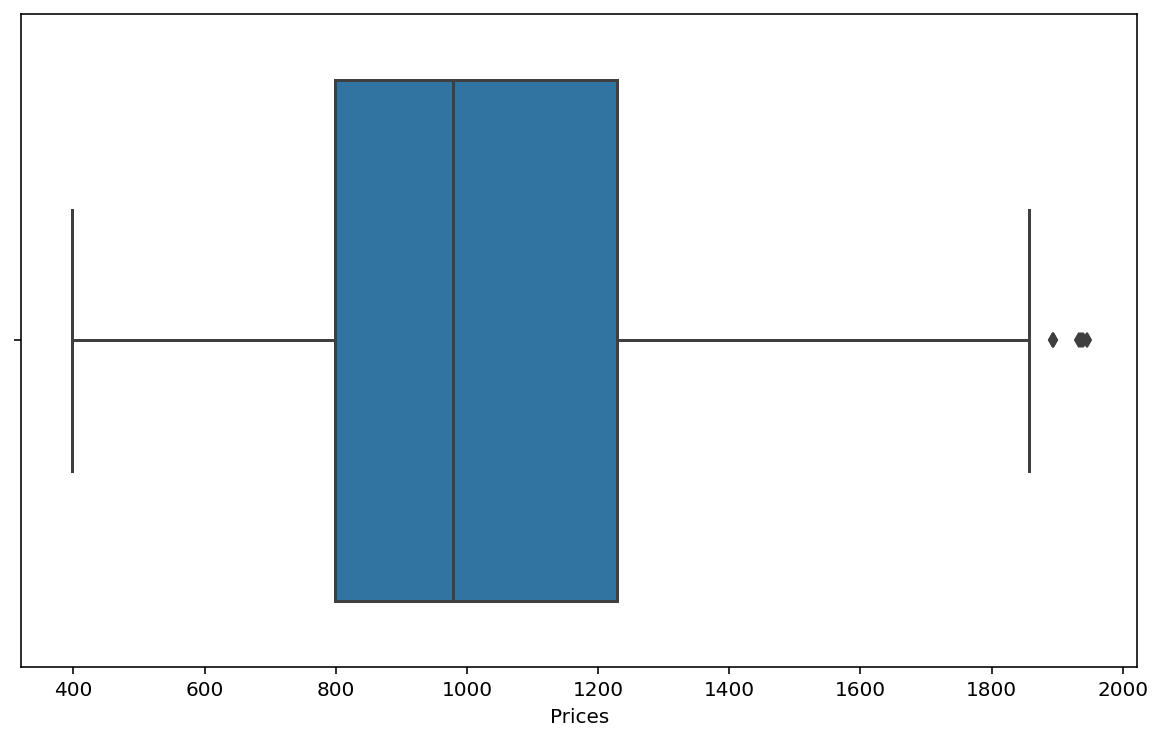

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Hotels_oyo, x='Prices');

### Histograms

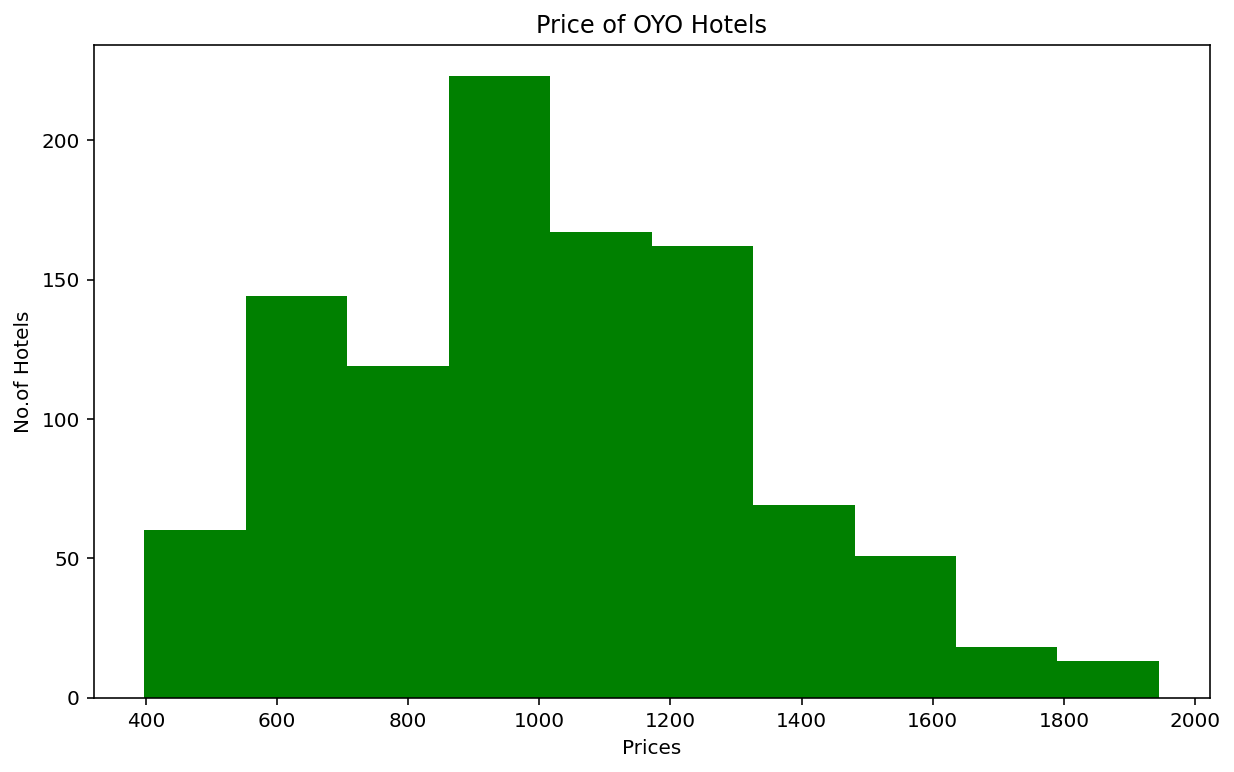

In [29]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_oyo['Prices'],color='green')
plt.xlabel("Prices")
plt.ylabel("No.of Hotels")
plt.title("Price of OYO Hotels")
plt.show();

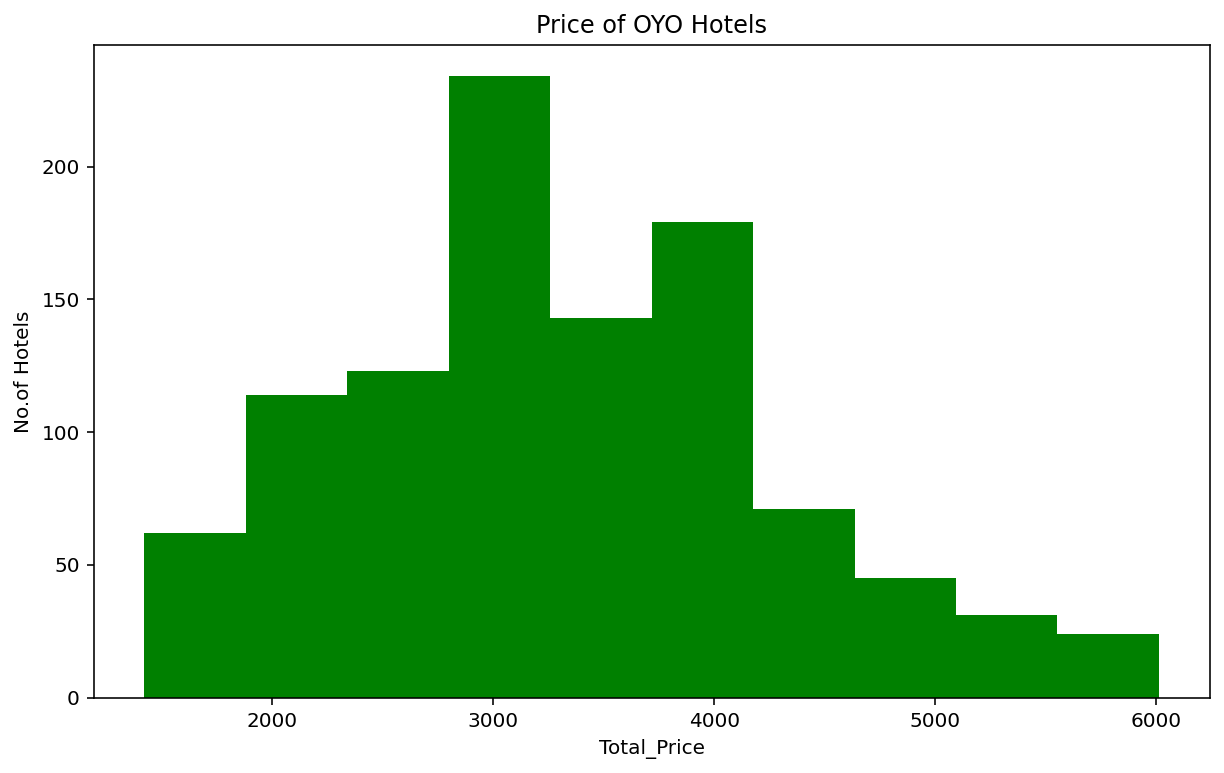

In [30]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_oyo['Total_Price'],color='green')
plt.xlabel("Total_Price")
plt.ylabel("No.of Hotels")
plt.title("Price of OYO Hotels")
plt.show();

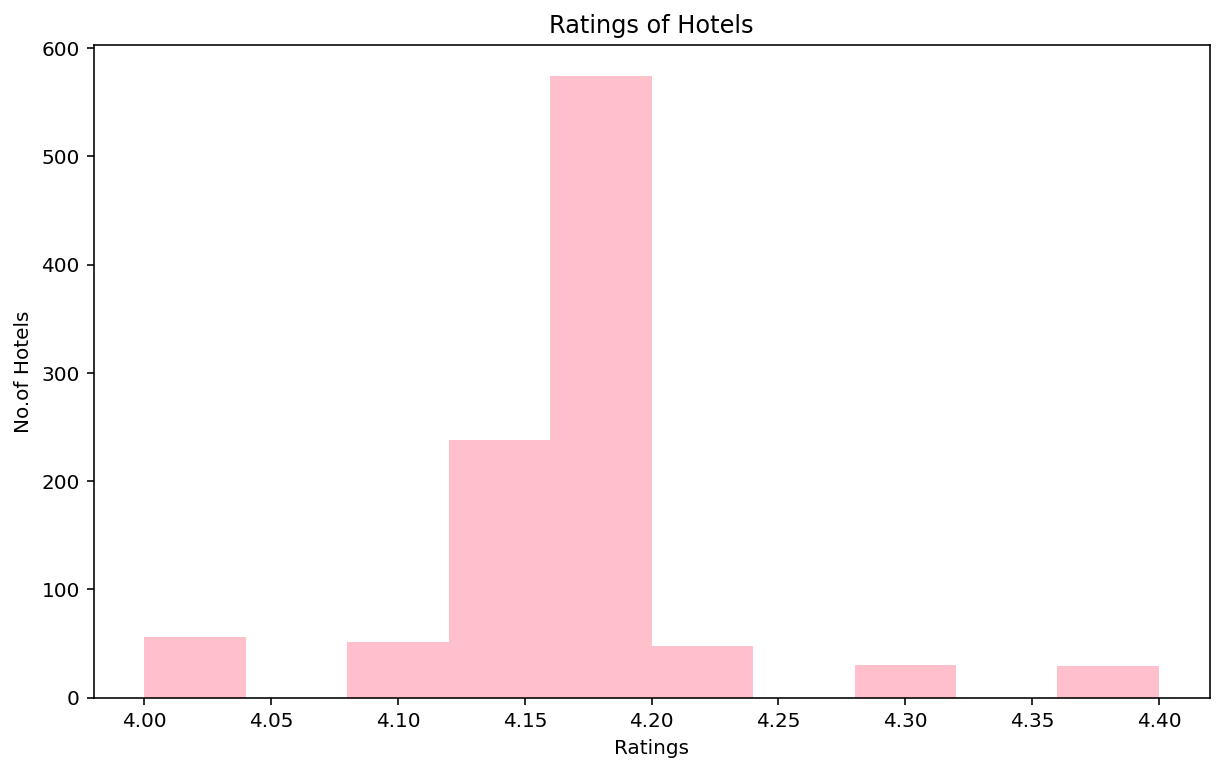

In [31]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_oyo['Ratings'],facecolor = 'pink')
plt.xlabel("Ratings")
plt.ylabel("No.of Hotels")
plt.title("Ratings of Hotels")
plt.show();

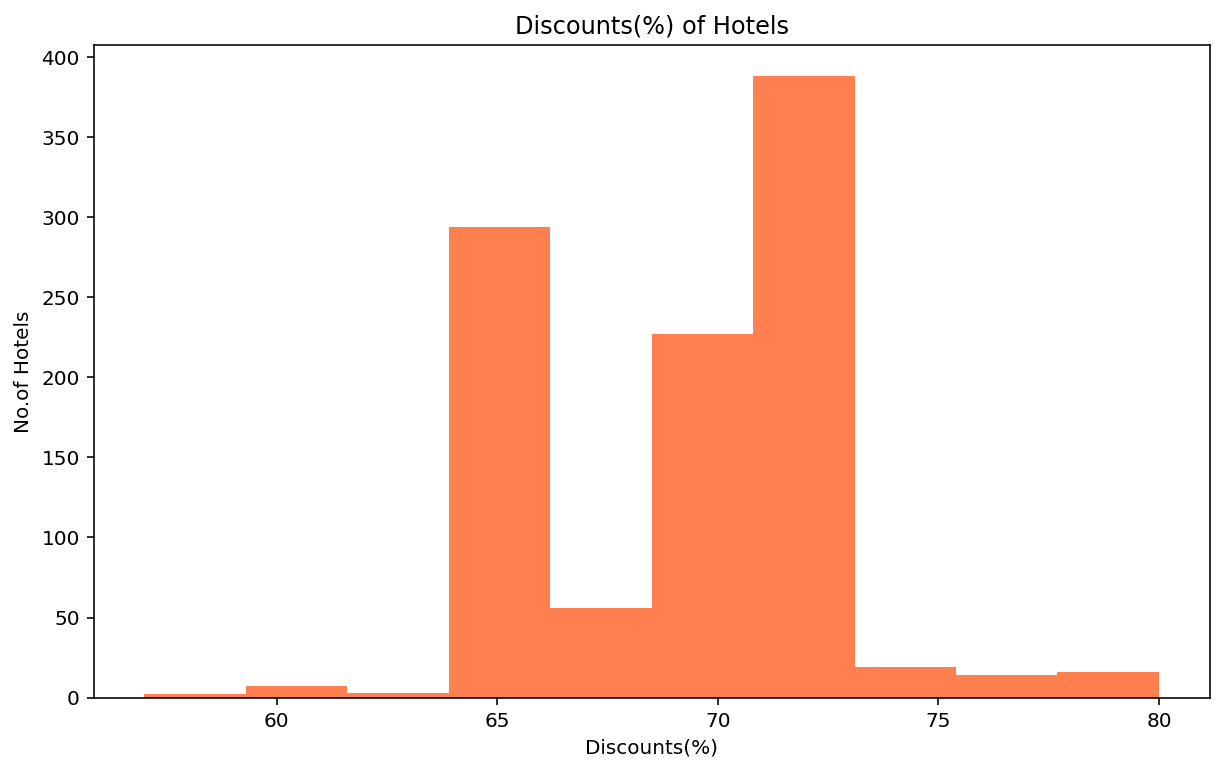

In [32]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_oyo['Booking_Discounts(%)'],facecolor = 'coral')
plt.xlabel("Discounts(%)")
plt.ylabel("No.of Hotels")
plt.title("Discounts(%) of Hotels")
plt.show();

### Pie Plot

In [33]:
city_values = Hotels_oyo['City_Name'].value_counts()
loc_city = Hotels_oyo['City_Name'].value_counts().index
city_values

Delhi        346
Hyderabad    186
Bangalore    172
Kolkata      138
Chennai       94
Lucknow       90
Name: City_Name, dtype: int64

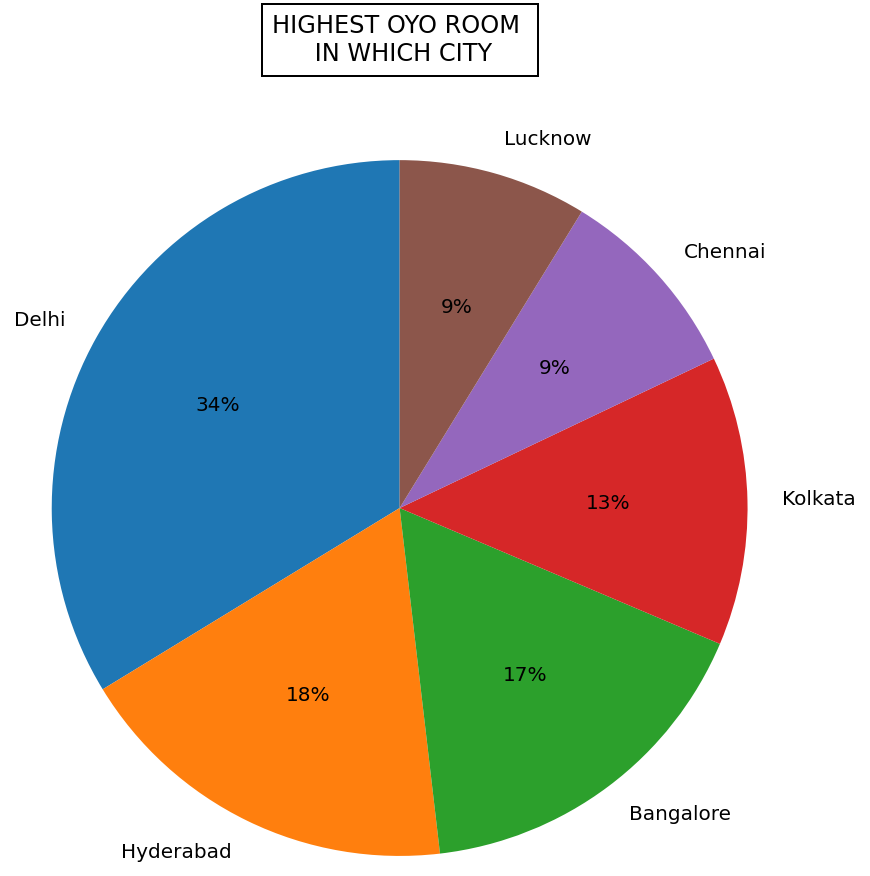

In [34]:
plt.title("HIGHEST OYO ROOM \n IN WHICH CITY", y = 1.5, bbox={'facecolor':'w', 'pad':5 })
plt.pie(city_values[:9], labels = loc_city[:9], autopct = "%1.0f%%", radius = 2, startangle = 90);

### Kde Plot

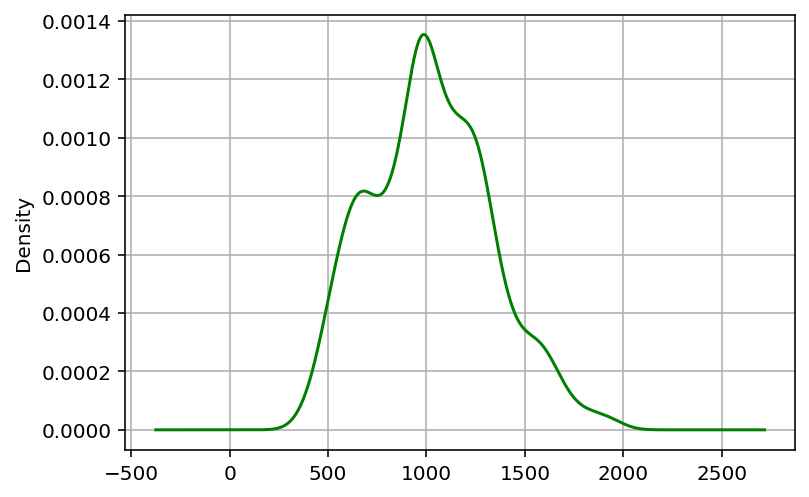

In [35]:
Hotels_oyo['Prices'].plot(kind='kde',color='green') ## numeric
plt.grid();

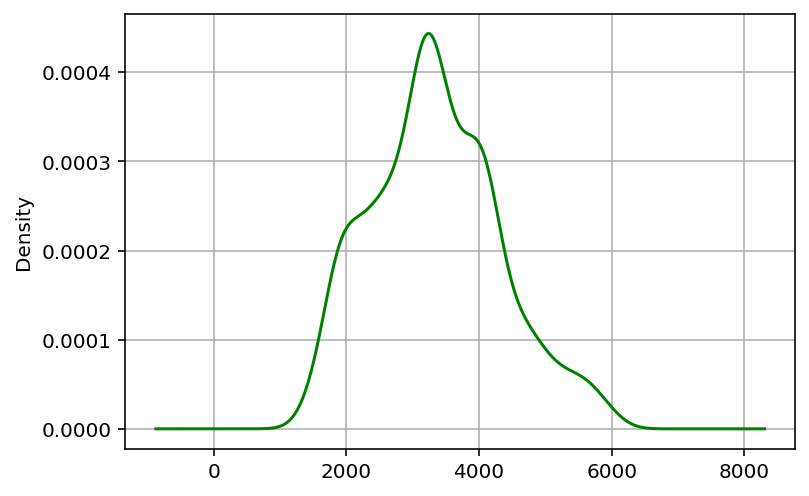

In [36]:
Hotels_oyo['Total_Price'].plot(kind='kde',color='green') ## numeric
plt.grid();

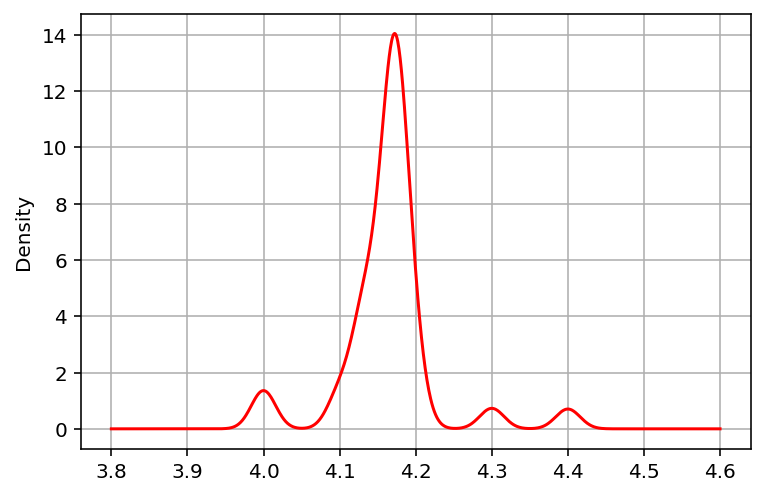

In [37]:
Hotels_oyo['Ratings'].plot(kind='kde',color='red') 
plt.grid();

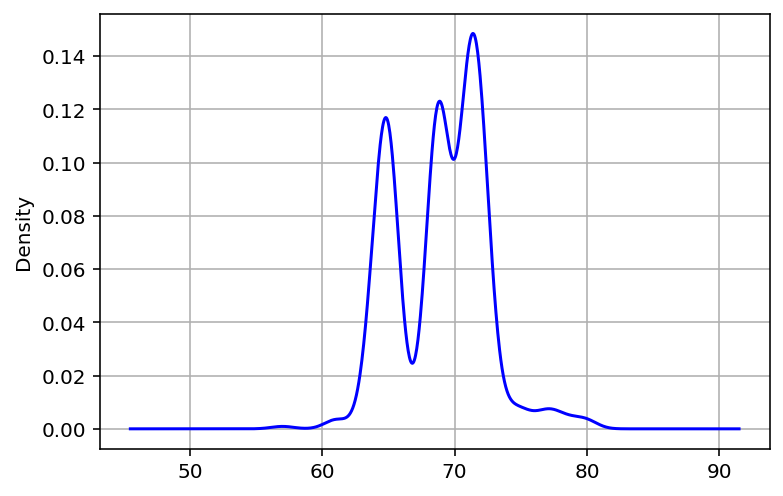

In [38]:
Hotels_oyo['Booking_Discounts(%)'].plot(kind='kde',color='blue') ## numeric
plt.grid();

### Count Plot

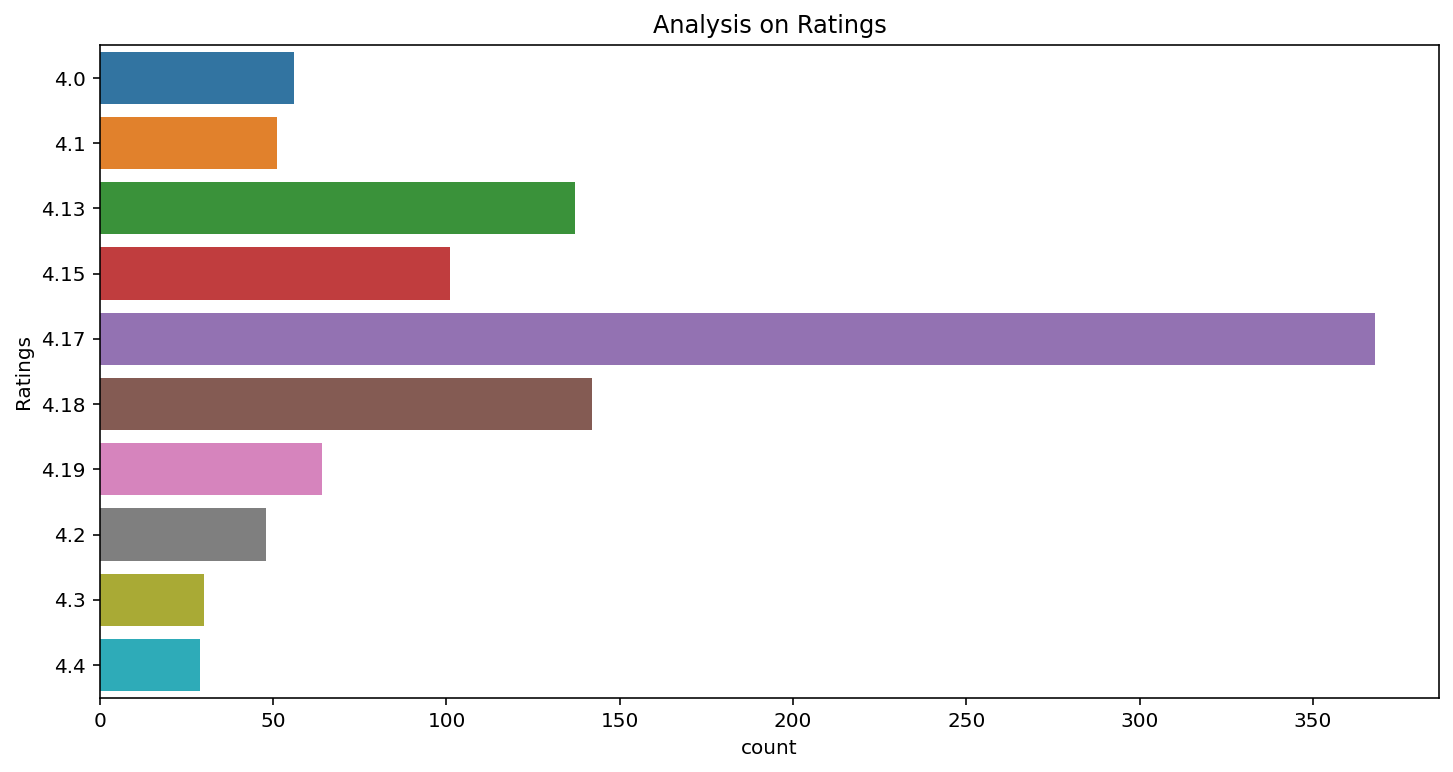

In [39]:
plt.figure(figsize=(12,6)) 
sns.countplot(y = "Ratings", data = Hotels_oyo)
plt.title("Analysis on Ratings")
plt.show();

## Bivariate Analysis

### Box plot

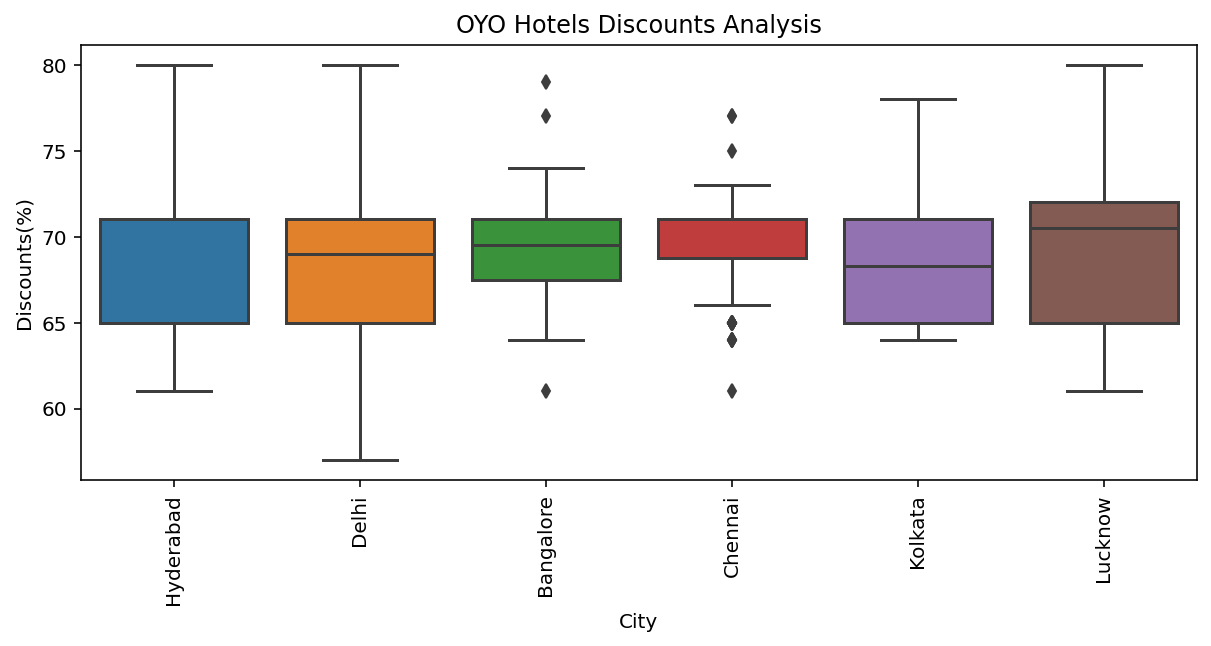

In [40]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="City_Name", y="Booking_Discounts(%)", data=Hotels_oyo)
plt.title('OYO Hotels Discounts Analysis')
plt.ylabel('Discounts(%)')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show();

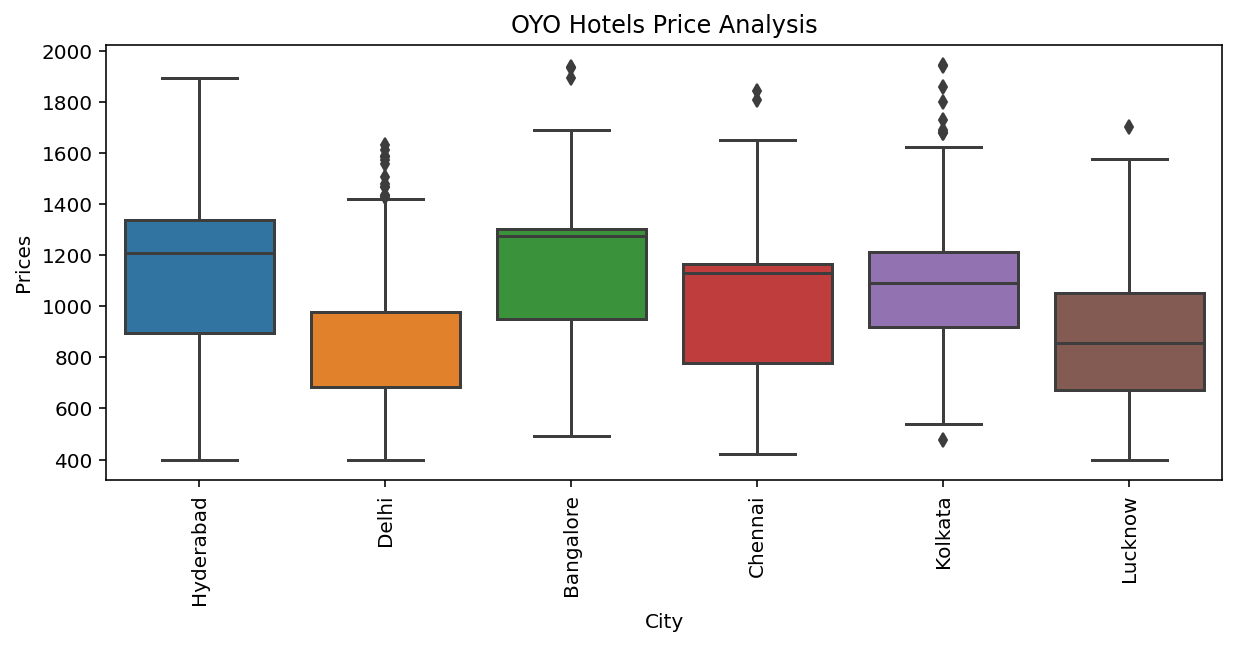

In [41]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="City_Name", y="Prices", data=Hotels_oyo)
plt.title('OYO Hotels Price Analysis')
plt.ylabel('Prices')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show();

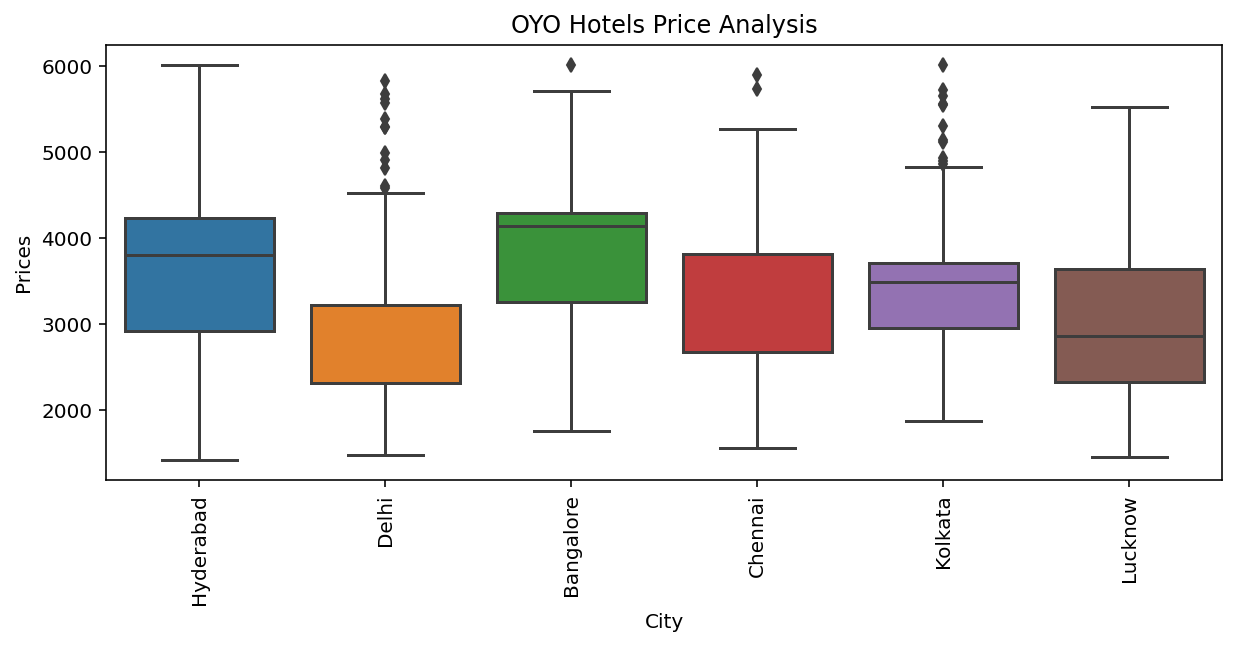

In [42]:
plt.figure(figsize=(10,4)) 
sns.boxplot(x="City_Name", y="Total_Price", data=Hotels_oyo)
plt.title('OYO Hotels Price Analysis')
plt.ylabel('Prices')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show();

### Bar Plot

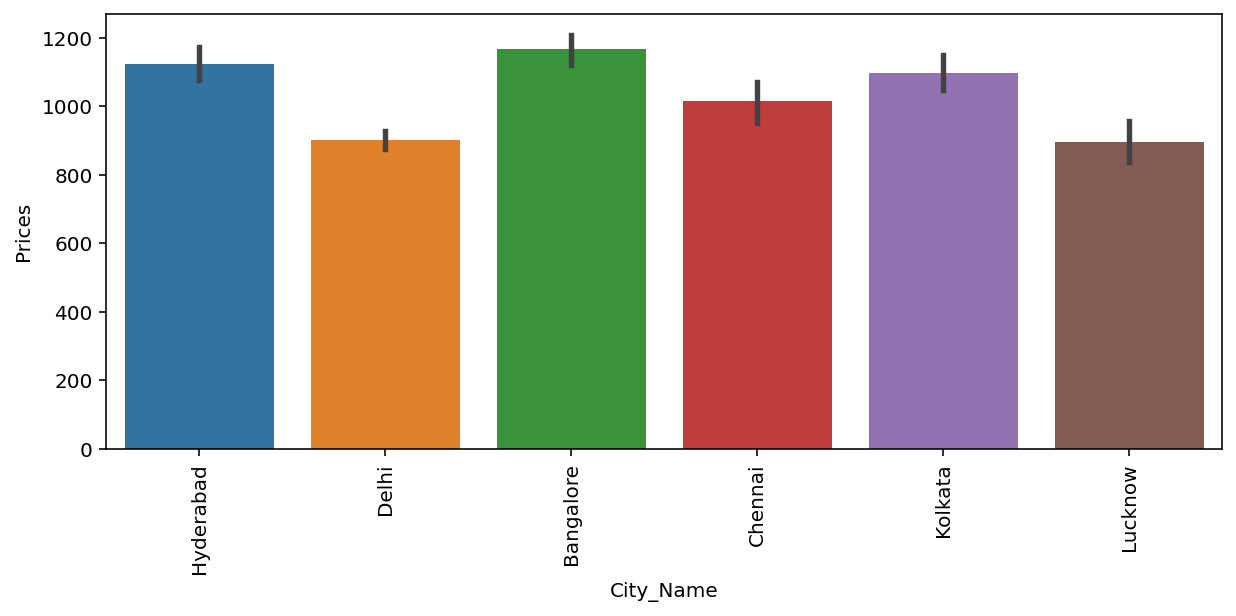

In [43]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='City_Name', y='Prices', data=Hotels_oyo)
plt.xticks(rotation = 90)
plt.show();

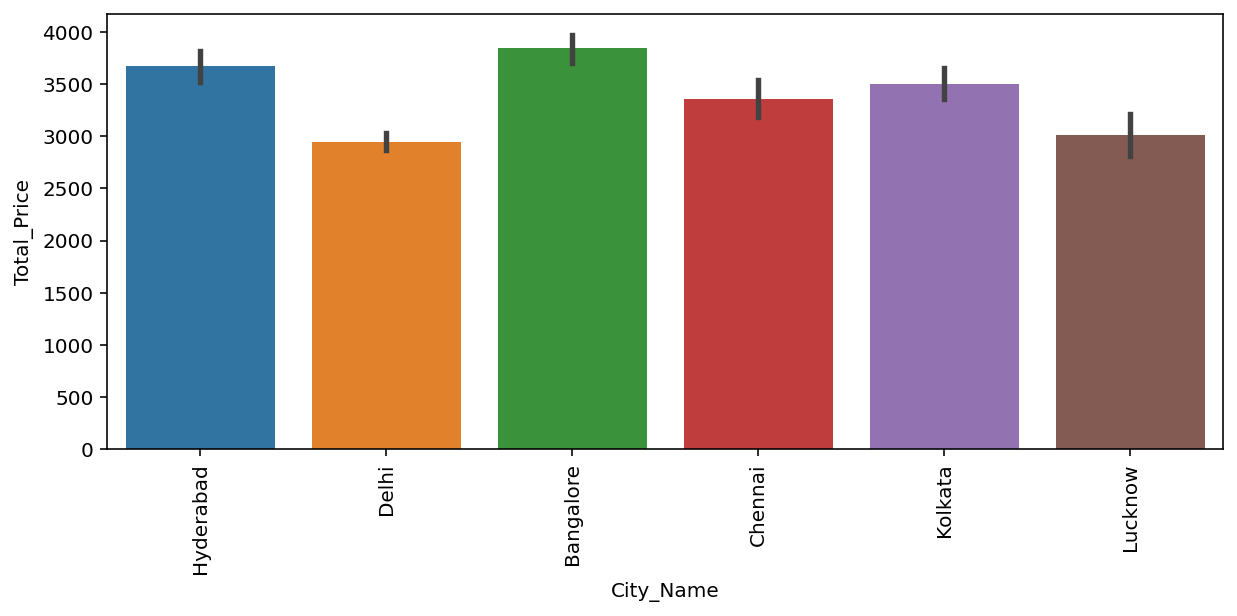

In [44]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='City_Name', y='Total_Price', data=Hotels_oyo)
plt.xticks(rotation = 90)
plt.show();

### Scatter Plot

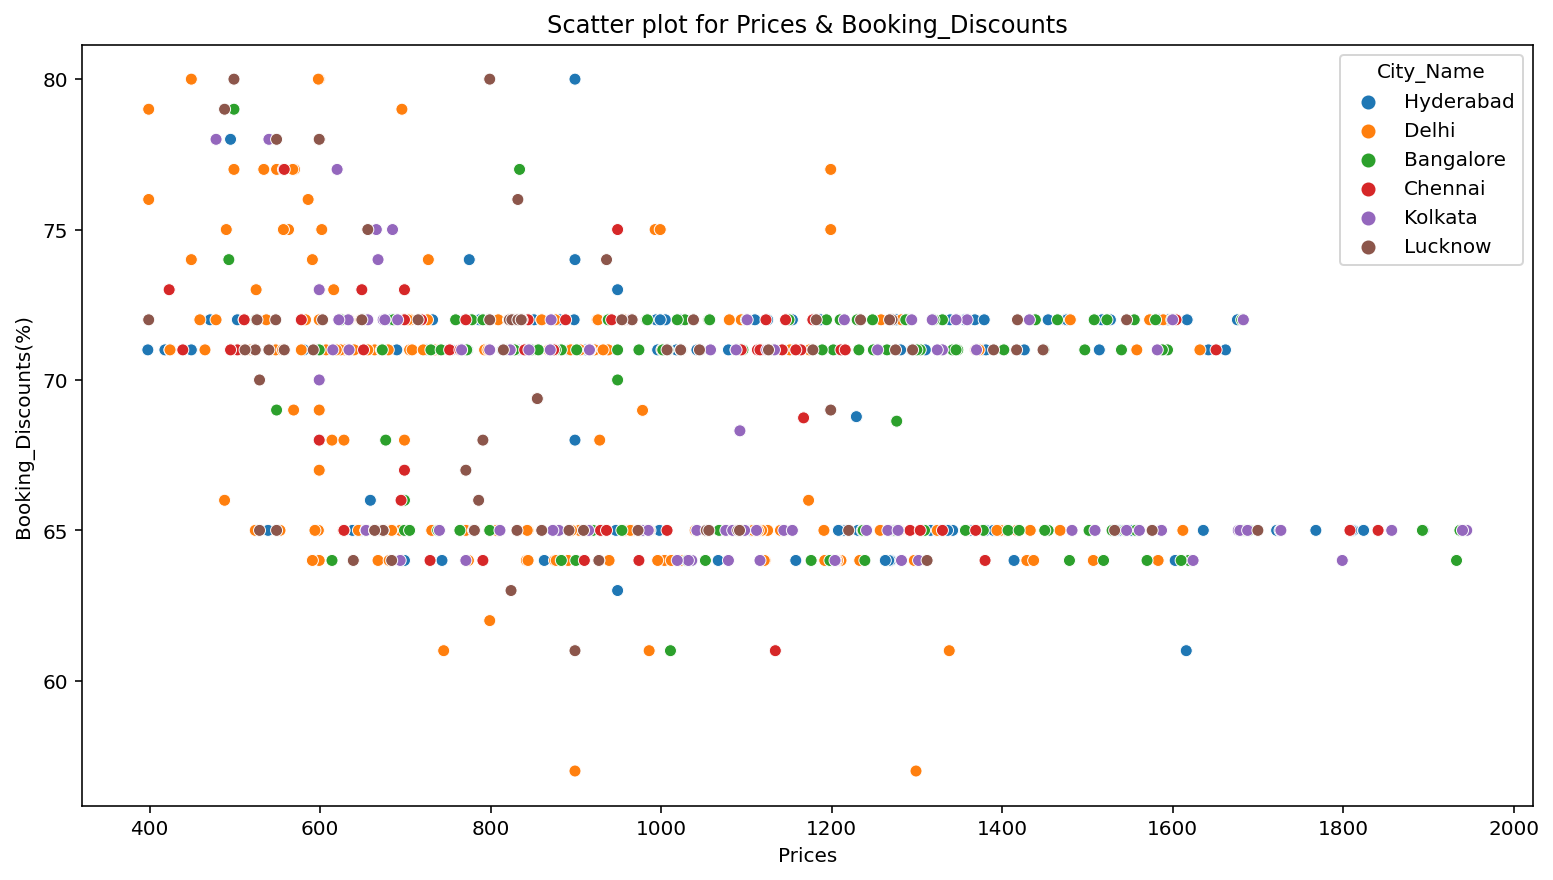

In [45]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Prices',y='Booking_Discounts(%)',data=Hotels_oyo,hue='City_Name')
plt.title("Scatter plot for Prices & Booking_Discounts");

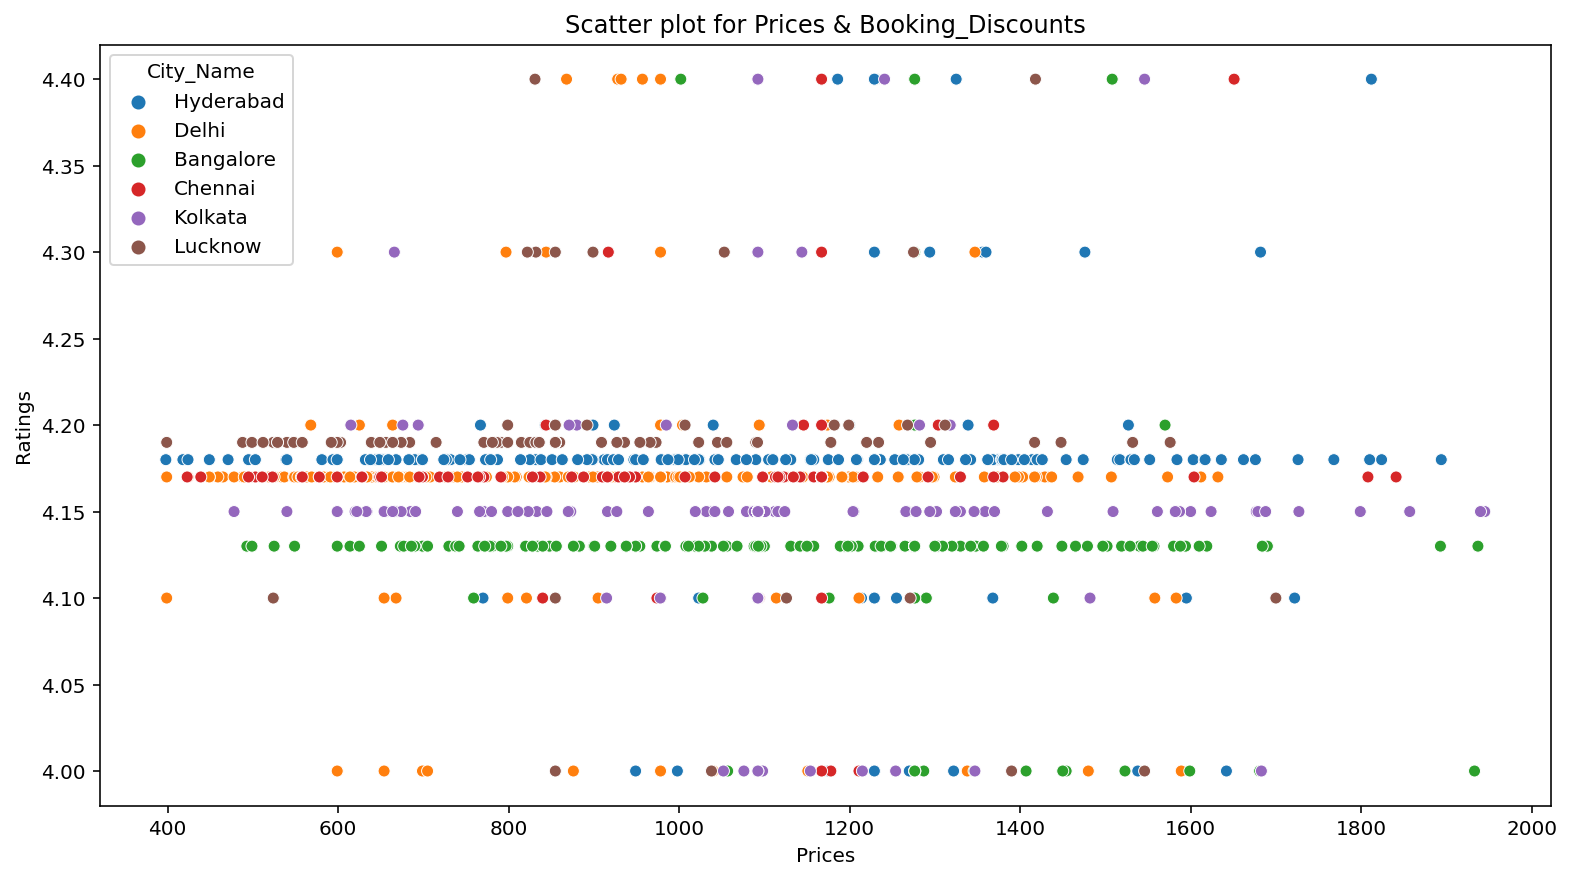

In [46]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Prices',y='Ratings',data=Hotels_oyo,hue='City_Name')
plt.title("Scatter plot for Prices & Booking_Discounts");

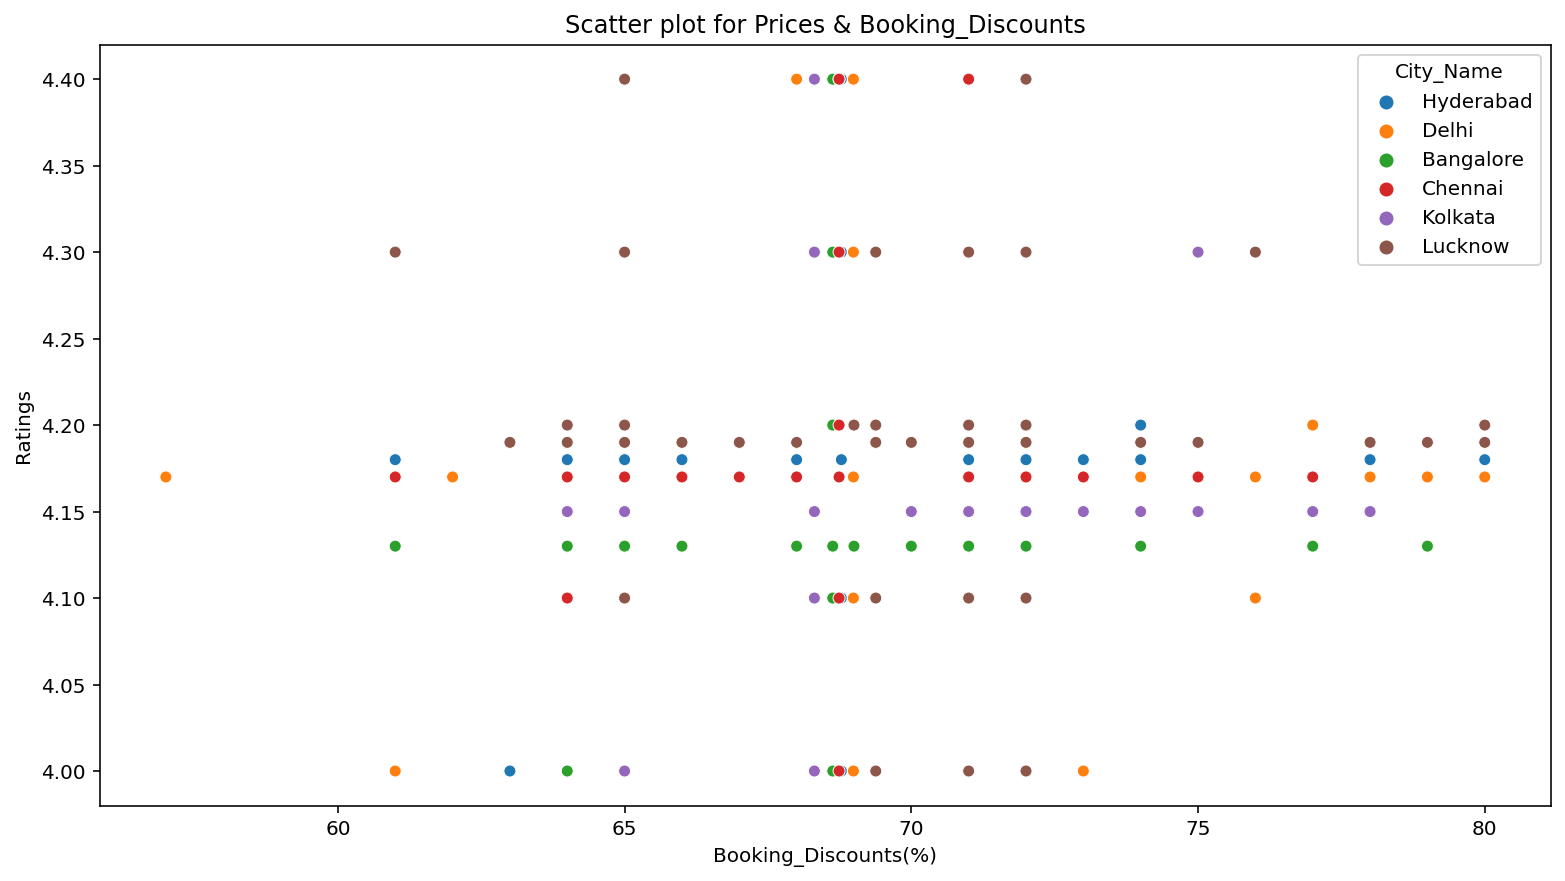

In [47]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Booking_Discounts(%)',y='Ratings',data=Hotels_oyo,hue='City_Name')
plt.title("Scatter plot for Prices & Booking_Discounts");

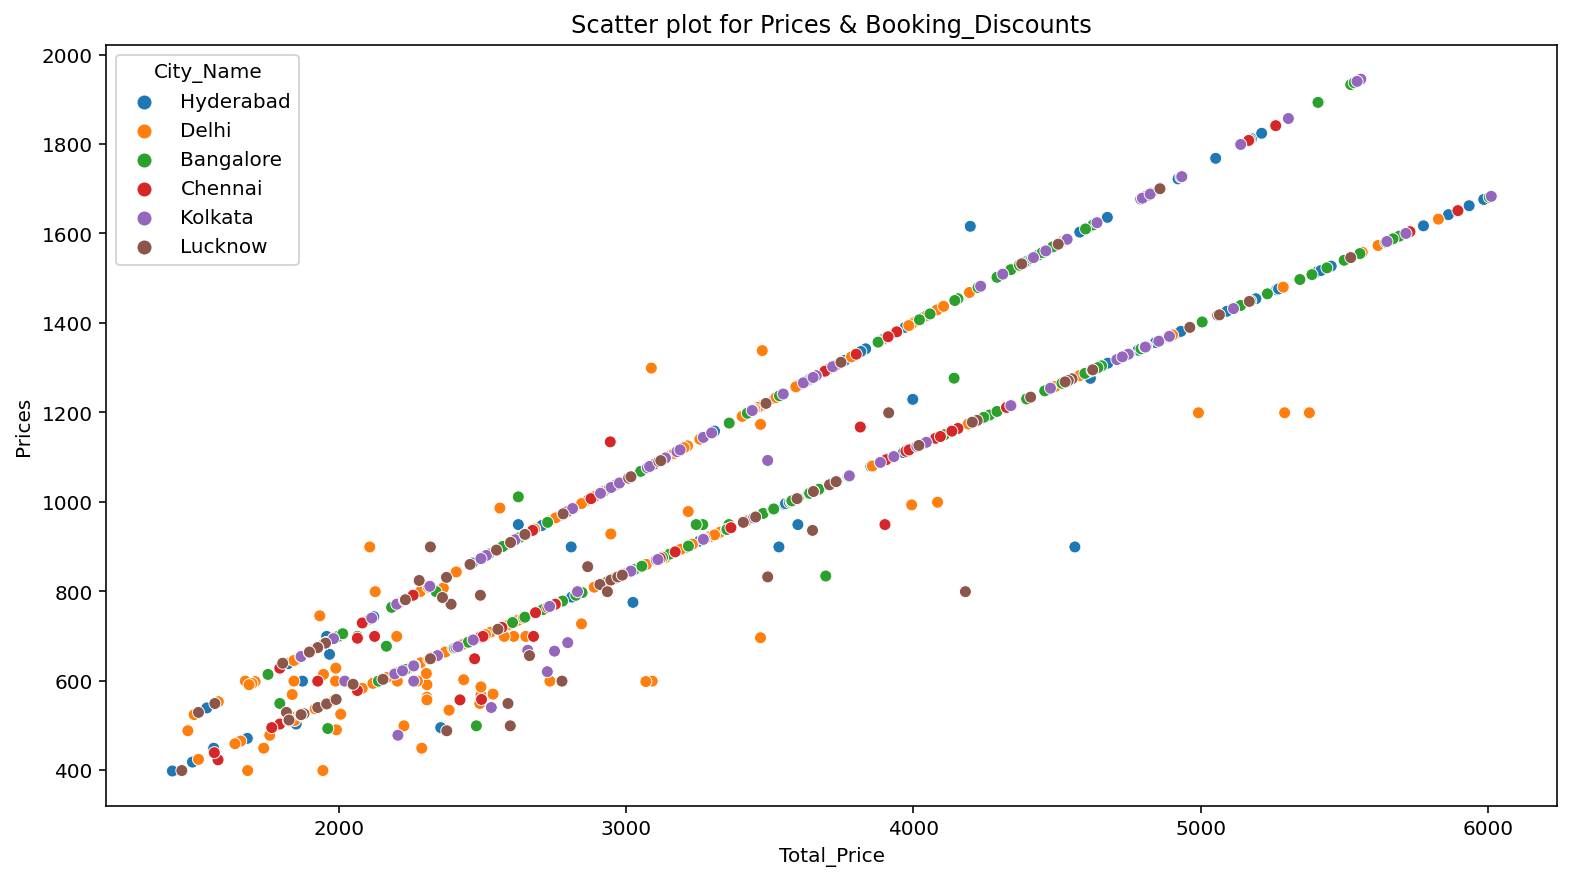

In [48]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Total_Price',y='Prices',data=Hotels_oyo,hue='City_Name')
plt.title("Scatter plot for Prices & Booking_Discounts");

### Multivariate Analysis

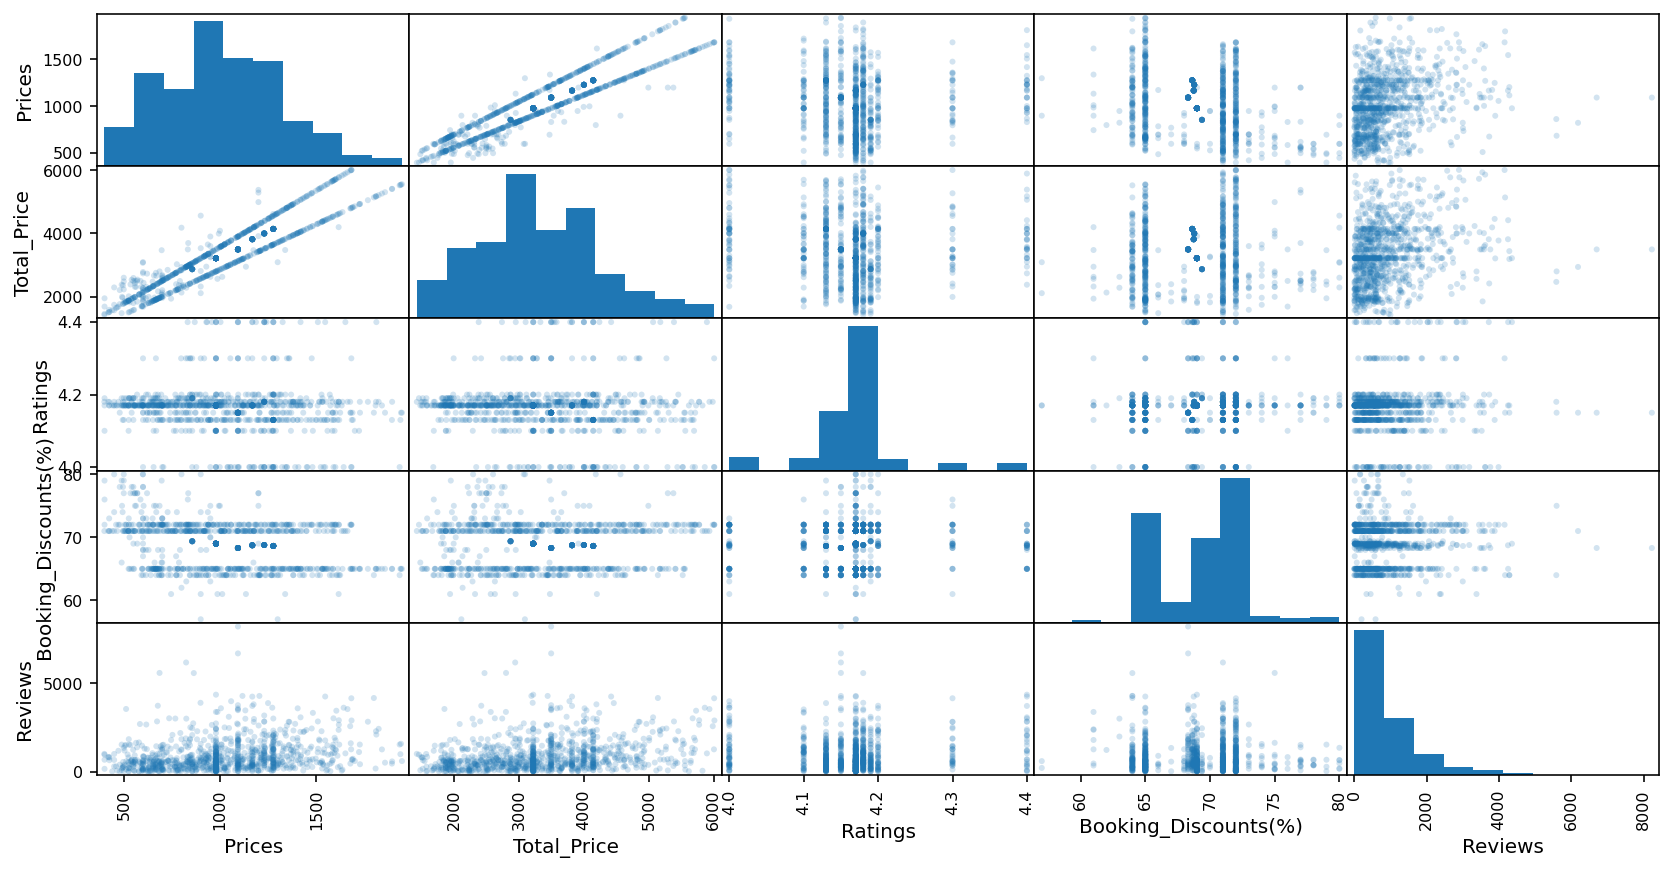

In [49]:
scatter_matrix(Hotels_oyo, alpha = 0.2, figsize = (14, 7) );

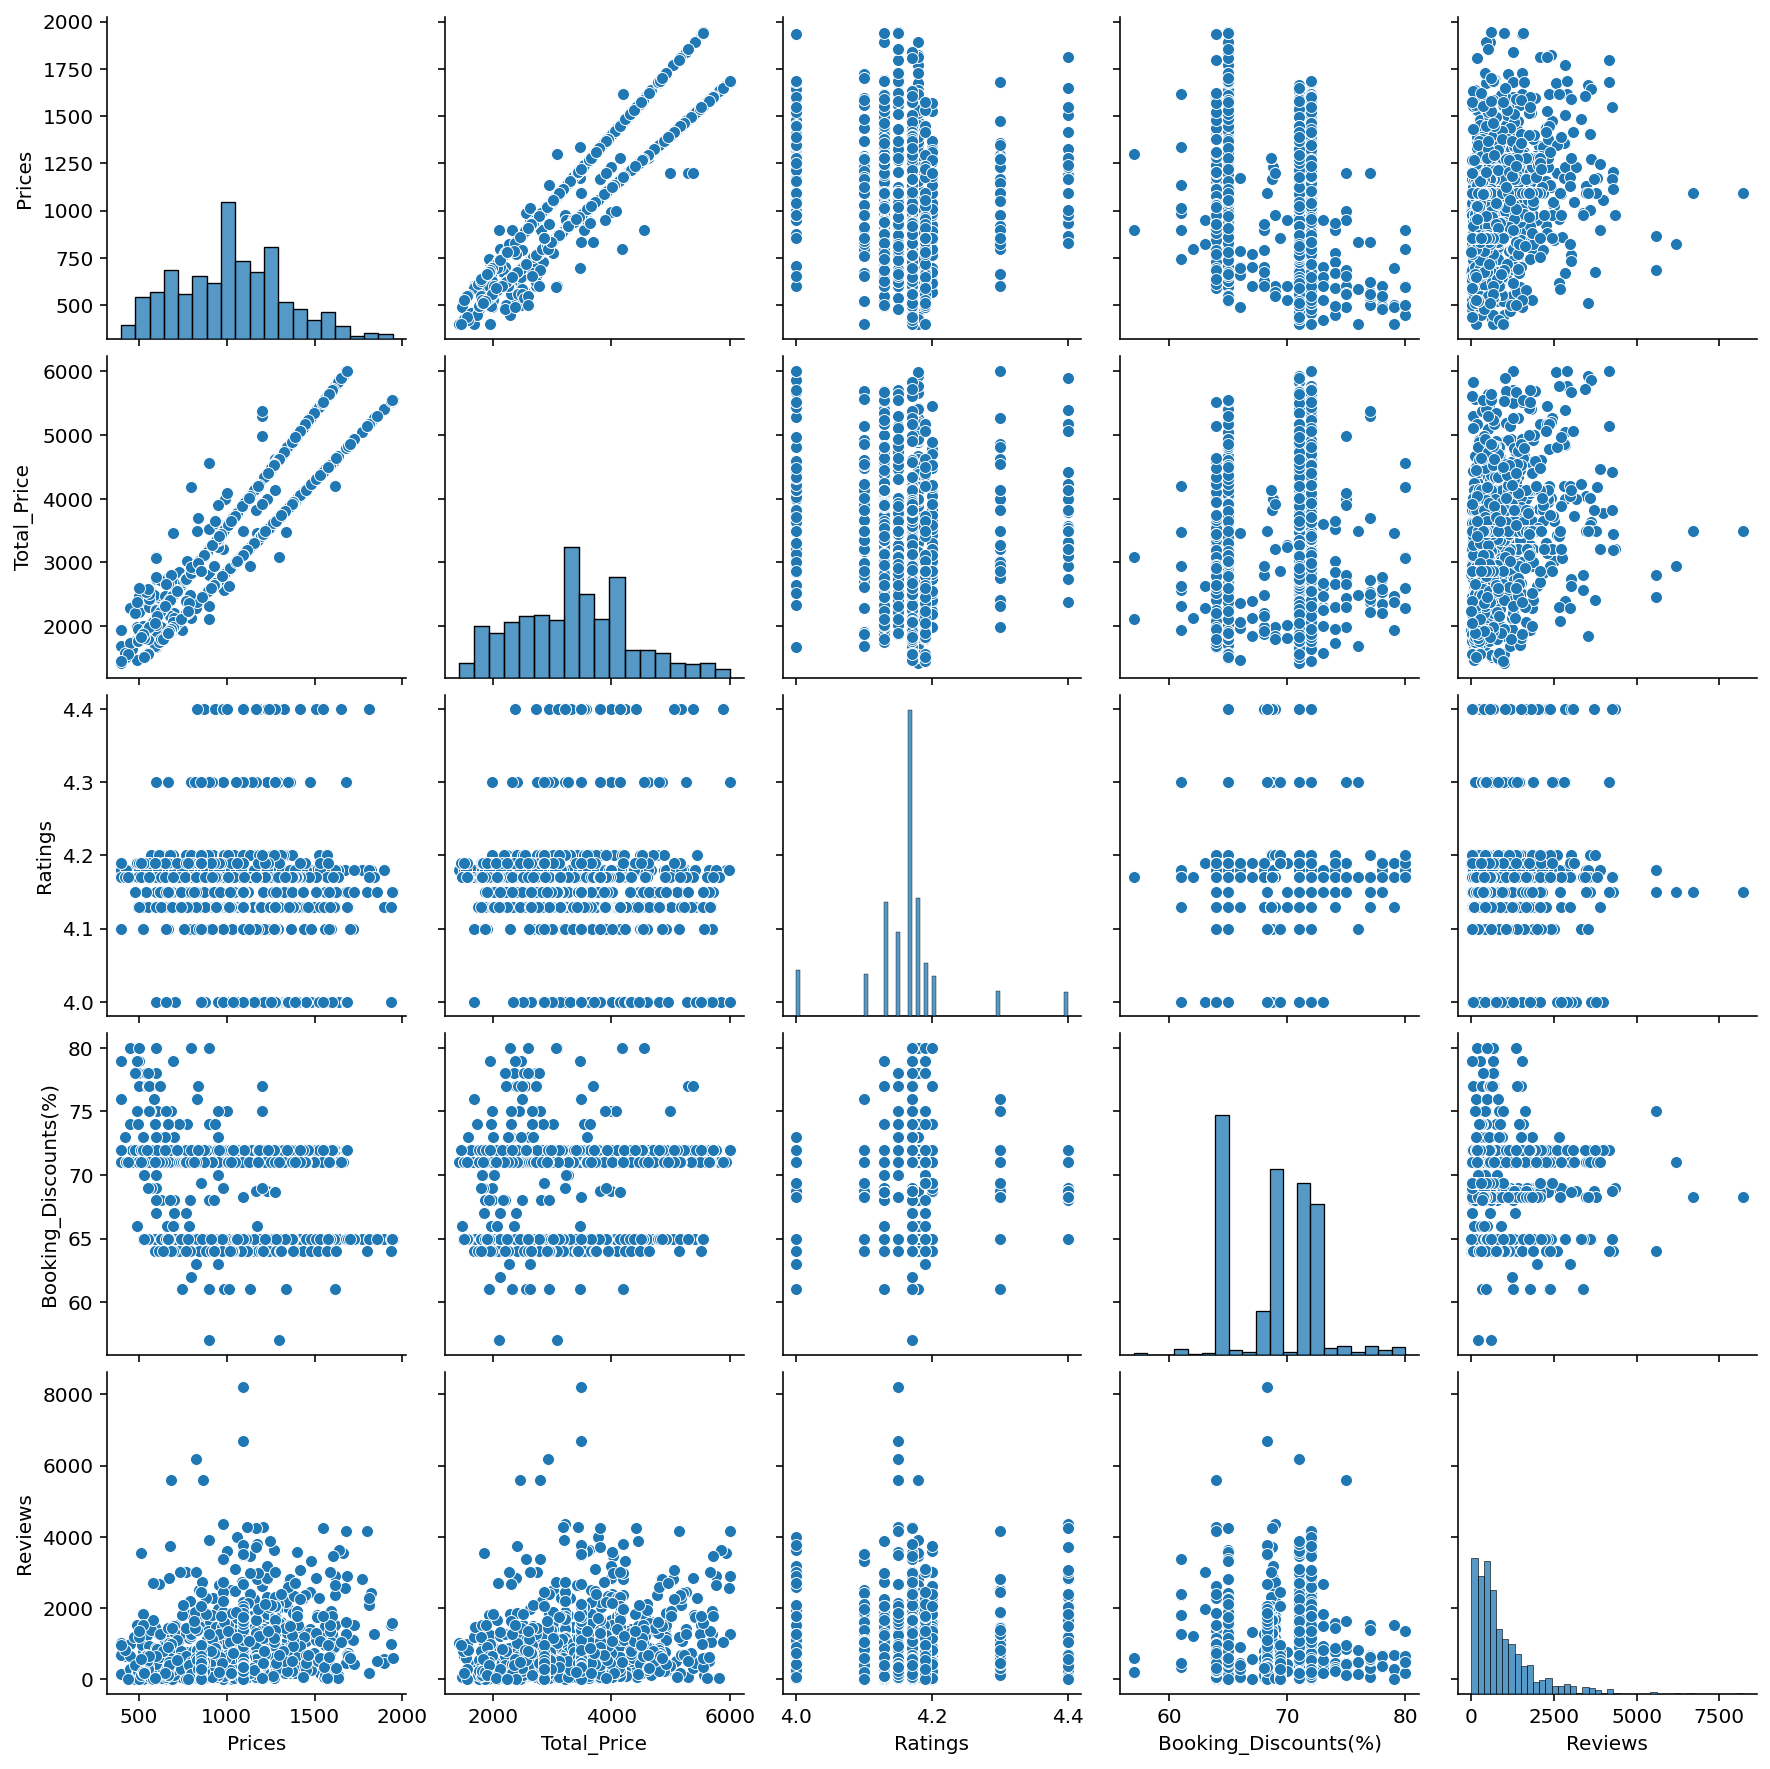

In [50]:
sns.pairplot(Hotels_oyo);

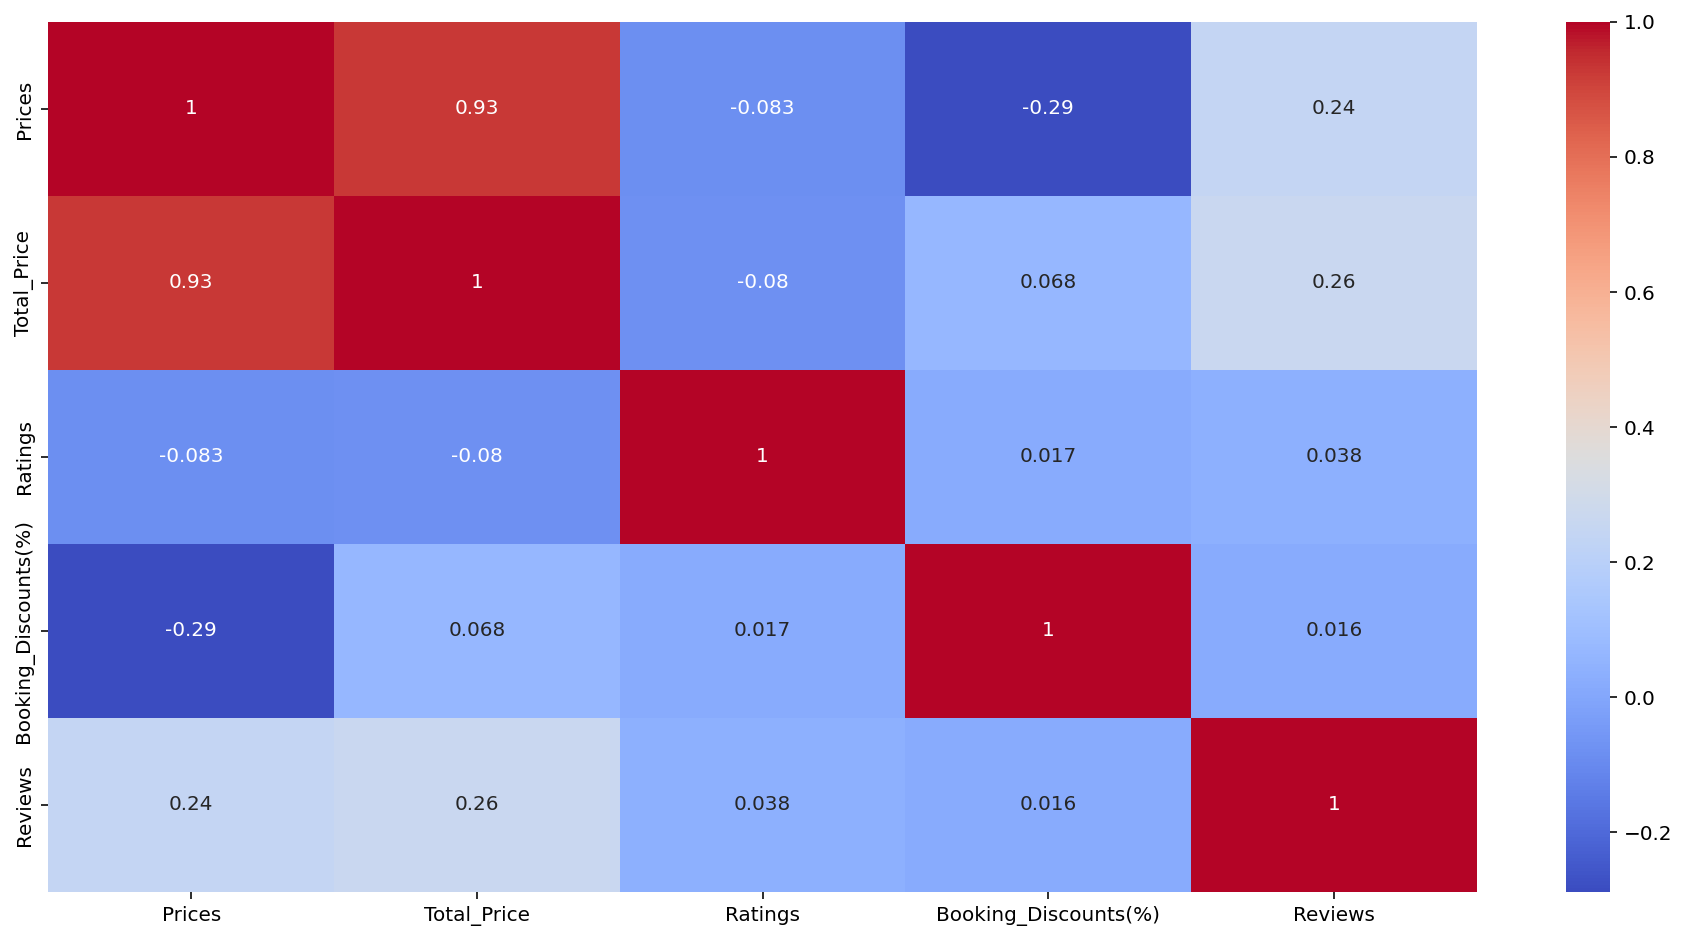

In [51]:
#Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(Hotels_oyo.corr(),annot=True, cbar=True, cmap='coolwarm');

## (4). Machine learning model `problem statement`:-

**Bulding a model which can predict the Prices of each hotels on the basic of their informative records in the Hotel_oyo data set.**

  + **Target_variable is--->   `Prices.`**

In [52]:
Hotels_oyo

Hotels   Prices  Total_Price  \
1               Capital O 86948 Hotel Sai Balaji  1040.00      2972.00   
2     Flagship 76655 Goldhorn Hotels Mehdipatnam  1595.00      5697.00   
3                         OYO 70857 Dream Suites  1474.00      5264.00   
4      Capital O 700516 S V Residency Nalagandla   732.00      2614.00   
5               Flagship 61858 Hotel Banyan Tree  1131.00      4038.00   
...                                          ...      ...          ...   
1825                        OYO 82473 Hotel Meet   854.83      2866.52   
1826    OYO Flagship 702584 Jn Rooms And Banquet   854.83      2866.52   
1827                OYO 85551 Hotel Rudra Palace   854.83      2866.52   
1828                  Flagship 79156 Hotel Tokyo   854.83      2866.52   
1830       Capital O 84117 The Diamond Night Inn   854.83      2866.52   

      Ratings  Booking_Discounts(%)  Reviews          Facilities  \
1        4.20                 65.00    987.0          Reception    
2        4.10                 72.00   1915.0        Living Room    
3        4.18                 72.00   1414.0          Reception    
4        4.18                 72.00     73.0     Doctor on call    
5        4.18                 71.00   3465.0   Parking facility    
...       ...                   ...      ...                 ...   
1825     4.19                 69.38    425.0          Reception    
1826     4.10                 69.38     13.0         Free Wi-Fi    
1827     4.19                 69.38    542.0   Parking facility    
1828     4.30                 69.38    452.0     Doctor on call    
1830     4.19                 69.38    287.0     Doctor on call    

                                                Address  \
1           Rajendra Nagar Suncity Hyderabad, Hyderabad   
2                                Mehdipatnam, Hyderabad   
3        Near kphb metro station, Kukatpally, Hyderabad   
4                                 Nalagandla, Hyderabad   
5     Centrally Located, Near Huda Park, Kukatpally,...   
...                                                 ...   
1825  Pandariba Opposite Purana Post Office Charbagh...   
1826     hardoi bypass road alamnagar lucknow , Lucknow   
1827                                    226023, Lucknow   
1828  1/1000 Vinay Khand (patrakarpuram) Near Malik ...   
1830                               Gomti Nagar, Lucknow   

                                      Informations  City_Name  
1      1k+ people booked this OYO in last 6 months  Hyderabad  
2       8 people booked this hotel in last 6 hours  Hyderabad  
3               All staff vaccinated with 1st dose  Hyderabad  
4       7 people booked this hotel in last 6 hours  Hyderabad  
5       8 people booked this hotel in last 6 hours  Hyderabad  
...                                            ...        ...  
1825    7 people booked this hotel in last 6 hours    Lucknow  
1826    6 people booked this hotel in last 6 hours    Lucknow  
1827  900+ people booked this OYO in last 6 months    Lucknow  
1828            All staff vaccinated with 1st dose    Lucknow  
1830    6 people booked this hotel in last 6 hours    Lucknow  

[1026 rows x 10 columns]

In [53]:
Hotels_oyo.dtypes

Hotels                   object
Prices                  float64
Total_Price             float64
Ratings                 float64
Booking_Discounts(%)    float64
Reviews                 float64
Facilities               object
Address                  object
Informations             object
City_Name                object
dtype: object

In [54]:
Hotels_oyo['City_Name'].value_counts(normalize = True)

Delhi        0.337232
Hyderabad    0.181287
Bangalore    0.167641
Kolkata      0.134503
Chennai      0.091618
Lucknow      0.087719
Name: City_Name, dtype: float64

In [55]:
Hotels_oyo['Informations'].value_counts(normalize = True) # we have to remove this feature because it cause curse of 
                                                          # dimensionality in your data set. 

All staff vaccinated with 1st dose              0.402534
1k+ people booked this OYO in last 6 months     0.097466
Hurry, Only 1 room left!                        0.054581
6 people booked this hotel in last 6 hours      0.053606
7 people booked this hotel in last 6 hours      0.038986
8 people booked this hotel today                0.036062
8 people booked this hotel in last 6 hours      0.031189
Erratic check-in experience                     0.028265
700+ people booked this OYO in last 6 months    0.027290
9 people booked this hotel today                0.026316
9 people booked this hotel in last 6 hours      0.024366
900+ people booked this OYO in last 6 months    0.020468
800+ people booked this OYO in last 6 months    0.020468
600+ people booked this OYO in last 6 months    0.018519
2k+ people booked this OYO in last 6 months     0.015595
10 people booked this hotel today               0.010721
All staff vaccinated with both doses            0.009747
11 people booked this hotel in 

In [56]:
Hotels_oyo['Address'].value_counts(normalize = True) # we have to remove this feature because it cause curse of 
                                                          # dimensionality in your data set. 

Rangareddy, Hyderabad                                              0.010721
New Delhi, Delhi                                                   0.009747
Near Aero City, Mahipalpur Extension, Delhi                        0.007797
Bangalore Urban, Bangalore                                         0.007797
Near New Delhi Railway Station, Delhi                              0.004873
                                                                     ...   
C-43 sector15 vasundhra Ghaziabad 201012                           0.000975
Near Boom Plaza, Sushant Lok III, Gurgaon                          0.000975
Chaman Awana Office, Sector 15 Noida                               0.000975
1134 Sector 38, Gurgaon                                            0.000975
1/1000 Vinay Khand (patrakarpuram) Near Malik Timber Gomtinagar    0.000975
Name: Address, Length: 916, dtype: float64

In [57]:
Hotels_oyo['Hotels'].value_counts(normalize = True) # we have to remove this feature because it cause curse of 
                                                          # dimensionality in your data set. 

Townhouse OAK Dreamland Suites                          0.001949
OYO 7697 India Gate Par View                            0.000975
Collection O 14320 Pride Manyata                        0.000975
Flagship 11640 Hotel Aaira Inn                          0.000975
Collection O 80212 Druvin boutique hotel                0.000975
                                                          ...   
OYO 90654 Hotel Grand Luxury                            0.000975
Flagship 75033 Shri Drona Hotel                         0.000975
OYO Home 78203 Spacious Studio Sector 21-a Faridabad    0.000975
Collection O 87877 Prince Palace                        0.000975
Capital O 84117 The Diamond Night Inn                   0.000975
Name: Hotels, Length: 1025, dtype: float64

In [58]:
Hotels_oyo['Facilities'].value_counts(normalize = True)

 Parking facility            0.253411
 Reception                   0.239766
 Free Wi-Fi                  0.127680
 Elevator                    0.083821
 AC                          0.075049
 Private entrance            0.067251
 Hair Dryer                  0.059454
 Doctor on call              0.048733
 Living Room                 0.012671
 TV                          0.012671
 Power backup                0.004873
 Geyser                      0.003899
 Coffee/tea maker            0.001949
 Modern wardrobe             0.000975
 Twin Single Bed             0.000975
 Mini Bar                    0.000975
 Extra Mattress Possible     0.000975
 Electric Kettle             0.000975
 Cot                         0.000975
 Interconnected room         0.000975
 Queen Sized Bed             0.000975
 King Sized Bed              0.000975
Name: Facilities, dtype: float64

In [59]:
Hotels_oyo.drop(['Hotels', 'Address', 'Informations'], axis= 1, inplace= True)
Hotels_oyo.head(10)

Prices  Total_Price  Ratings  Booking_Discounts(%)  Reviews  \
1   1040.0       2972.0     4.20                  65.0    987.0   
2   1595.0       5697.0     4.10                  72.0   1915.0   
3   1474.0       5264.0     4.18                  72.0   1414.0   
4    732.0       2614.0     4.18                  72.0     73.0   
5   1131.0       4038.0     4.18                  71.0   3465.0   
6   1374.0       4905.0     4.18                  71.0   1401.0   
7    845.0       3018.0     4.30                  72.0   2505.0   
8   1005.0       3589.0     4.18                  72.0    851.0   
10  1368.0       3909.0     4.10                  65.0   1224.0   
11   832.0       2969.0     4.18                  71.0     76.0   

            Facilities  City_Name  
1           Reception   Hyderabad  
2         Living Room   Hyderabad  
3           Reception   Hyderabad  
4      Doctor on call   Hyderabad  
5    Parking facility   Hyderabad  
6    Parking facility   Hyderabad  
7    Parking facility   Hyderabad  
8           Reception   Hyderabad  
10          Reception   Hyderabad  
11           Elevator   Hyderabad

In [61]:
Hotels_oyo.drop(['Facilities',], axis= 1, inplace= True)
Hotels_oyo.head(10)

Prices  Total_Price  Ratings  Booking_Discounts(%)  Reviews  City_Name
1   1040.0       2972.0     4.20                  65.0    987.0  Hyderabad
2   1595.0       5697.0     4.10                  72.0   1915.0  Hyderabad
3   1474.0       5264.0     4.18                  72.0   1414.0  Hyderabad
4    732.0       2614.0     4.18                  72.0     73.0  Hyderabad
5   1131.0       4038.0     4.18                  71.0   3465.0  Hyderabad
6   1374.0       4905.0     4.18                  71.0   1401.0  Hyderabad
7    845.0       3018.0     4.30                  72.0   2505.0  Hyderabad
8   1005.0       3589.0     4.18                  72.0    851.0  Hyderabad
10  1368.0       3909.0     4.10                  65.0   1224.0  Hyderabad
11   832.0       2969.0     4.18                  71.0     76.0  Hyderabad

In [62]:
Hotels_oyo.shape

(1026, 6)

In [63]:
Hotels_oyo.columns

Index(['Prices', 'Total_Price', 'Ratings', 'Booking_Discounts(%)', 'Reviews',
       'City_Name'],
      dtype='object')

In [65]:
Hotels_oyo = Hotels_oyo[['Total_Price', 'Ratings', 'Booking_Discounts(%)', 'Reviews', 'City_Name', 'Prices']]
Hotels_oyo.head(10)

Total_Price  Ratings  Booking_Discounts(%)  Reviews  City_Name  Prices
1        2972.0     4.20                  65.0    987.0  Hyderabad  1040.0
2        5697.0     4.10                  72.0   1915.0  Hyderabad  1595.0
3        5264.0     4.18                  72.0   1414.0  Hyderabad  1474.0
4        2614.0     4.18                  72.0     73.0  Hyderabad   732.0
5        4038.0     4.18                  71.0   3465.0  Hyderabad  1131.0
6        4905.0     4.18                  71.0   1401.0  Hyderabad  1374.0
7        3018.0     4.30                  72.0   2505.0  Hyderabad   845.0
8        3589.0     4.18                  72.0    851.0  Hyderabad  1005.0
10       3909.0     4.10                  65.0   1224.0  Hyderabad  1368.0
11       2969.0     4.18                  71.0     76.0  Hyderabad   832.0

In [67]:
# Identifying the input & output/target variable

X = Hotels_oyo[['Total_Price', 'Ratings', 'Booking_Discounts(%)', 'Reviews', 'City_Name']]

y = Hotels_oyo['Prices']

In [68]:
y.head(10)

1     1040.0
2     1595.0
3     1474.0
4      732.0
5     1131.0
6     1374.0
7      845.0
8     1005.0
10    1368.0
11     832.0
Name: Prices, dtype: float64

In [69]:
X.head(10)

Total_Price  Ratings  Booking_Discounts(%)  Reviews  City_Name
1        2972.0     4.20                  65.0    987.0  Hyderabad
2        5697.0     4.10                  72.0   1915.0  Hyderabad
3        5264.0     4.18                  72.0   1414.0  Hyderabad
4        2614.0     4.18                  72.0     73.0  Hyderabad
5        4038.0     4.18                  71.0   3465.0  Hyderabad
6        4905.0     4.18                  71.0   1401.0  Hyderabad
7        3018.0     4.30                  72.0   2505.0  Hyderabad
8        3589.0     4.18                  72.0    851.0  Hyderabad
10       3909.0     4.10                  65.0   1224.0  Hyderabad
11       2969.0     4.18                  71.0     76.0  Hyderabad

In [70]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(769, 5) (769,)
(257, 5) (257,)


In [71]:
X_train.head()

Total_Price  Ratings  Booking_Discounts(%)  Reviews  City_Name
1647      2777.00     4.19                 78.00    651.0    Lucknow
609       1992.00     4.17                 75.00    185.0      Delhi
1820      2866.52     4.19                 69.38     11.0    Lucknow
1102      3877.00     4.13                 65.00   1513.0  Bangalore
544       1760.00     4.17                 72.00     15.0      Delhi

In [72]:
X_train.dtypes

Total_Price             float64
Ratings                 float64
Booking_Discounts(%)    float64
Reviews                 float64
City_Name                object
dtype: object

In [73]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head(10)

City_Name
1647    Lucknow
609       Delhi
1820    Lucknow
1102  Bangalore
544       Delhi
1026  Bangalore
706       Delhi
408       Delhi
845       Delhi
418       Delhi

In [74]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head(10)

Total_Price  Ratings  Booking_Discounts(%)  Reviews
1647      2777.00     4.19                 78.00    651.0
609       1992.00     4.17                 75.00    185.0
1820      2866.52     4.19                 69.38     11.0
1102      3877.00     4.13                 65.00   1513.0
544       1760.00     4.17                 72.00     15.0
1026      4812.00     4.13                 71.00    831.0
706       2959.00     4.17                 71.00    843.0
408       2845.00     4.17                 74.00    340.0
845       3216.35     4.17                 68.99   2187.0
418       2398.00     4.17                 71.00   2841.0

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),   
                                    columns = X_train_num.columns,        
                                    index = X_train_num.index)

In [76]:
X_train_num_rescaled.head()

Total_Price   Ratings  Booking_Discounts(%)   Reviews
1647    -0.588359  0.368135              2.637182 -0.308707
609     -1.408243  0.070296              1.759725 -0.824814
1820    -0.494861  0.368135              0.115956 -1.017523
1102     0.560524 -0.525381             -1.165131  0.645981
544     -1.650553  0.070296              0.882268 -1.013093

In [77]:
X_train_num_rescaled.shape

(769, 4)

In [78]:
print("(A). Number of Numerical Features:", scaler.n_features_in_)
print("(B). Mean of each column:", scaler.mean_)
print("(C). Std of each column:", np.sqrt(scaler.var_))

(A). Number of Numerical Features: 4
(B). Mean of each column: [3340.32547464    4.16527958   68.98355007  929.73525559]
(C). Std of each column: [9.57452184e+02 6.71504811e-02 3.41897159e+00 9.02913079e+02]


In [79]:
X_train_cat.head()

City_Name
1647    Lucknow
609       Delhi
1820    Lucknow
1102  Bangalore
544       Delhi

In [81]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

In [82]:
X_train_cat_ohe.head()

City_Name_Chennai  City_Name_Delhi  City_Name_Hyderabad  \
1647                0.0              0.0                  0.0   
609                 0.0              1.0                  0.0   
1820                0.0              0.0                  0.0   
1102                0.0              0.0                  0.0   
544                 0.0              1.0                  0.0   

      City_Name_Kolkata  City_Name_Lucknow  
1647                0.0                1.0  
609                 0.0                0.0  
1820                0.0                1.0  
1102                0.0                0.0  
544                 0.0                0.0

In [83]:
X_train_cat_ohe.shape

(769, 5)

In [84]:
encoder_.categories_

[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Lucknow'],
       dtype=object)]

In [85]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed

Total_Price   Ratings  Booking_Discounts(%)   Reviews  \
1647    -0.588359  0.368135              2.637182 -0.308707   
609     -1.408243  0.070296              1.759725 -0.824814   
1820    -0.494861  0.368135              0.115956 -1.017523   
1102     0.560524 -0.525381             -1.165131  0.645981   
544     -1.650553  0.070296              0.882268 -1.013093   
...           ...       ...                   ...       ...   
1445    -0.044206 -2.461331             -1.165131 -0.751717   
283     -0.410804  3.495439             -0.287674 -0.955502   
1072     0.613790 -0.525381              0.882268 -0.776083   
974     -0.298005 -0.525381              0.589783 -0.719599   
1173     0.836872 -0.525381             -0.103408 -0.485911   

      City_Name_Chennai  City_Name_Delhi  City_Name_Hyderabad  \
1647                0.0              0.0                  0.0   
609                 0.0              1.0                  0.0   
1820                0.0              0.0                  0.0   
1102                0.0              0.0                  0.0   
544                 0.0              1.0                  0.0   
...                 ...              ...                  ...   
1445                0.0              0.0                  0.0   
283                 0.0              1.0                  0.0   
1072                0.0              0.0                  0.0   
974                 0.0              0.0                  0.0   
1173                0.0              0.0                  0.0   

      City_Name_Kolkata  City_Name_Lucknow  
1647                0.0                1.0  
609                 0.0                0.0  
1820                0.0                1.0  
1102                0.0                0.0  
544                 0.0                0.0  
...                 ...                ...  
1445                1.0                0.0  
283                 0.0                0.0  
1072                0.0                0.0  
974                 0.0                0.0  
1173                0.0                0.0  

[769 rows x 9 columns]

In [86]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head(10)

City_Name
1363    Kolkata
33    Hyderabad
108   Hyderabad
704       Delhi
1544    Kolkata
2     Hyderabad
341       Delhi
1174  Bangalore
1601    Kolkata
1229    Chennai

In [87]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head(10)

Total_Price  Ratings  Booking_Discounts(%)  Reviews
1363      2261.00     4.15                 72.00     21.0
33        3517.00     4.40                 65.00    328.0
108       2692.00     4.18                 71.00     89.0
704       3404.00     4.17                 65.00    279.0
1544      4639.00     4.15                 64.00    306.0
2         5697.00     4.10                 72.00   1915.0
341       1984.00     4.17                 65.00    398.0
1174      4141.59     4.00                 68.63    229.0
1601      3492.89     4.15                 68.31    457.0
1229      5895.00     4.40                 71.00   1029.0

In [88]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head(10)

Total_Price   Ratings  Booking_Discounts(%)   Reviews
1363    -1.127289 -0.227542              0.882268 -1.006448
33       0.184526  3.495439             -1.165131 -0.666438
108     -0.677136  0.219215              0.589783 -0.931136
704      0.066504  0.070296             -1.165131 -0.720706
1544     1.356386 -0.227542             -1.457617 -0.690803
2        2.461402 -0.972139              0.882268  1.091207
341     -1.416599  0.070296             -1.165131 -0.588911
1174     0.836872 -2.461331             -0.103408 -0.776083
1601     0.159344 -0.227542             -0.197004 -0.523567
1229     2.668201  3.495439              0.589783  0.109938

In [89]:
X_test_num_rescaled.shape

(257, 4)

In [90]:
X_test_cat.head()

City_Name
1363    Kolkata
33    Hyderabad
108   Hyderabad
704       Delhi
1544    Kolkata

In [93]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

In [94]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed

Total_Price   Ratings  Booking_Discounts(%)   Reviews  \
1363    -1.127289 -0.227542              0.882268 -1.006448   
33       0.184526  3.495439             -1.165131 -0.666438   
108     -0.677136  0.219215              0.589783 -0.931136   
704      0.066504  0.070296             -1.165131 -0.720706   
1544     1.356386 -0.227542             -1.457617 -0.690803   
...           ...       ...                   ...       ...   
110      1.615407  0.219215              0.882268  0.082250   
1727     1.265520  2.006246              0.589783  0.509755   
284     -0.346049  0.070296              0.589783  0.963841   
623     -1.275599  0.070296              0.589783 -0.899018   
271      0.686734  0.219215             -0.059535 -0.644287   

      City_Name_Chennai  City_Name_Delhi  City_Name_Hyderabad  \
1363                0.0              0.0                  0.0   
33                  0.0              0.0                  1.0   
108                 0.0              0.0                  1.0   
704                 0.0              1.0                  0.0   
1544                0.0              0.0                  0.0   
...                 ...              ...                  ...   
110                 0.0              0.0                  1.0   
1727                0.0              0.0                  0.0   
284                 0.0              1.0                  0.0   
623                 0.0              1.0                  0.0   
271                 0.0              0.0                  1.0   

      City_Name_Kolkata  City_Name_Lucknow  
1363                1.0                0.0  
33                  0.0                0.0  
108                 0.0                0.0  
704                 0.0                0.0  
1544                1.0                0.0  
...                 ...                ...  
110                 0.0                0.0  
1727                0.0                1.0  
284                 0.0                0.0  
623                 0.0                0.0  
271                 0.0                0.0  

[257 rows x 9 columns]

## KNeighborsRegressor

In [95]:
%%time
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 281 ms
Wall time: 2.01 s


KNeighborsRegressor()

In [96]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1363   633.0     690.80
33    1231.0    1093.92
108    754.0     762.60
704   1191.0    1144.20
1544  1624.0    1683.80

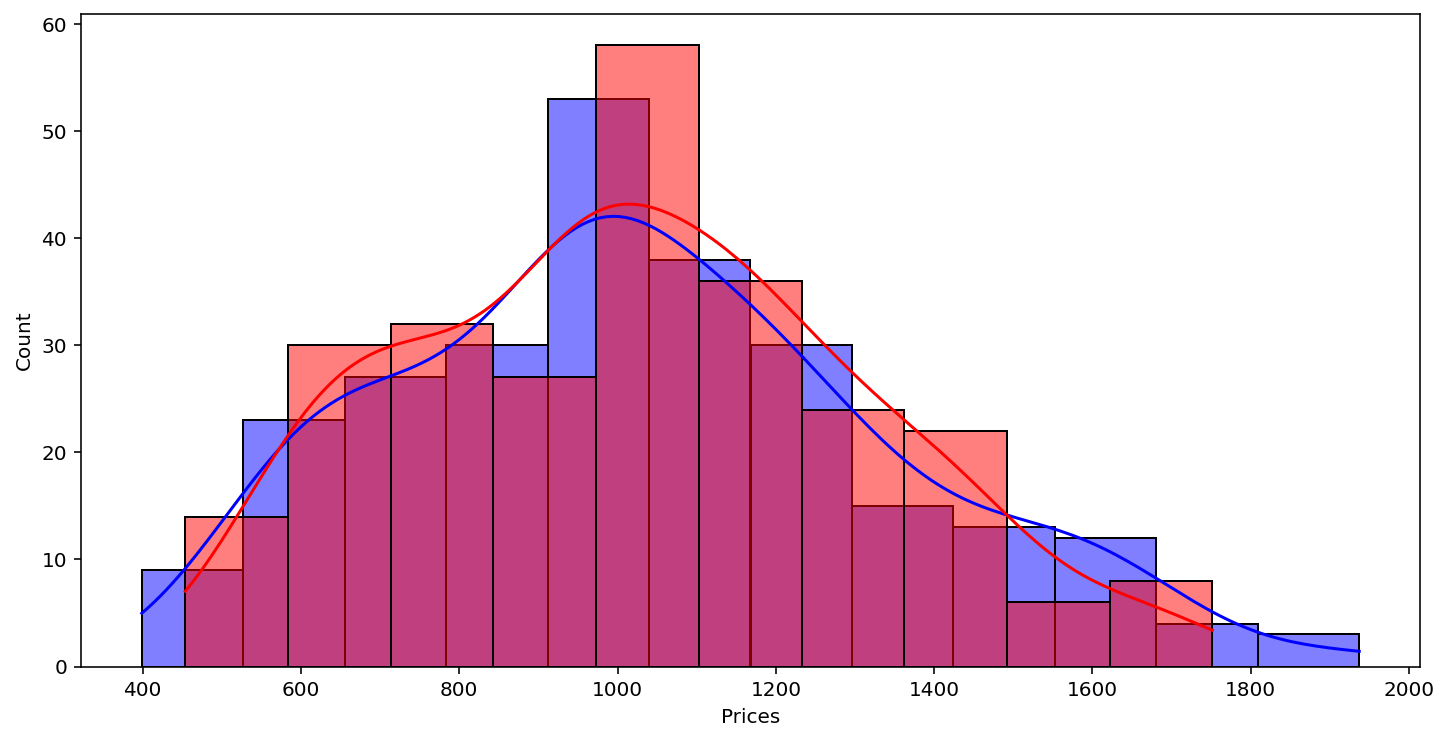

In [97]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [99]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  43.53695719844358
Mean Squared Error:  5774.836836280157
Root Mean Squared Error:  75.99234722181015


In [100]:
mae_1 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_1 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_1 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## LinearRegression

In [101]:
%%time
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 62.5 ms
Wall time: 715 ms


LinearRegression()

In [102]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual    Predicted
1363   633.0   604.670555
33    1231.0  1202.235561
108    754.0   760.326836
704   1191.0  1161.695003
1544  1624.0  1577.557962

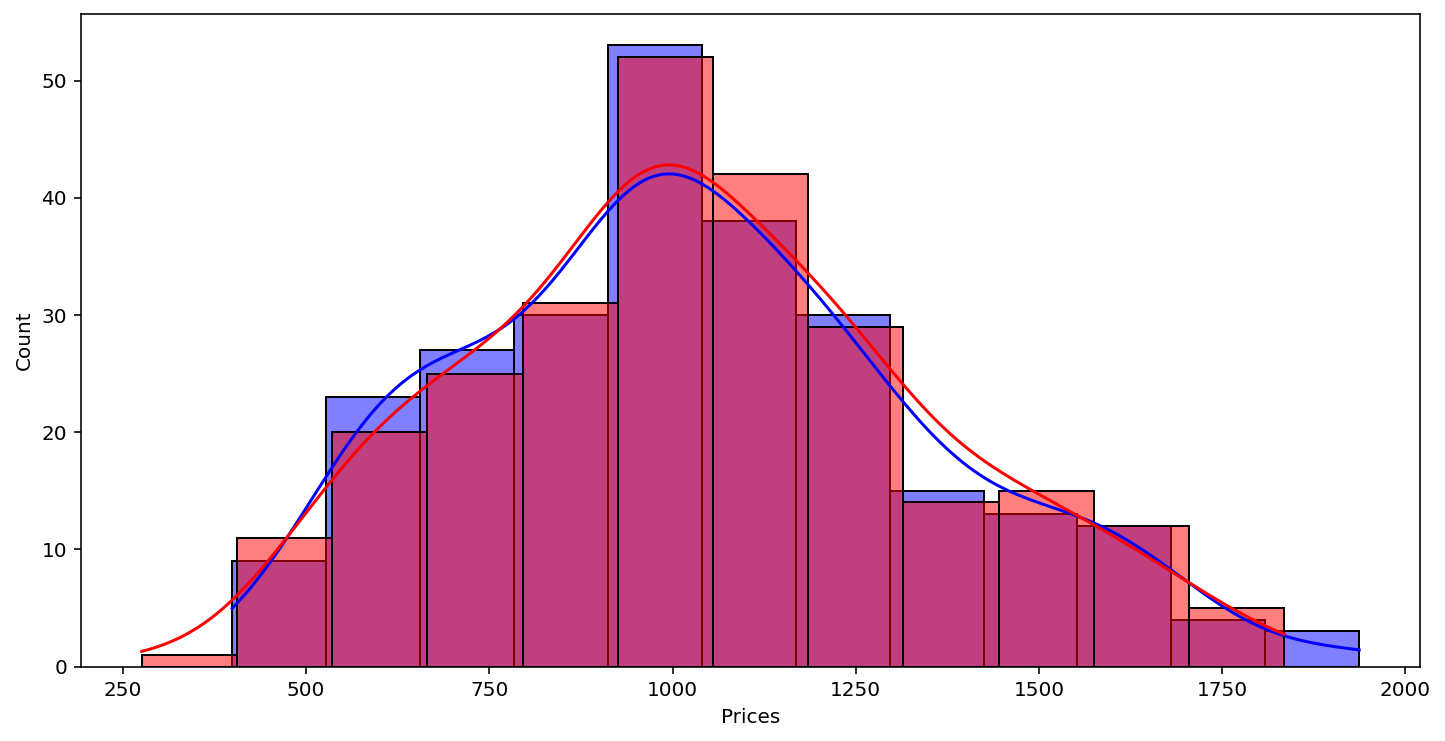

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [104]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  25.954358119429276
Mean Squared Error:  1484.437038636365
Root Mean Squared Error:  38.52839262980439


In [105]:
mae_2 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_2 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## DecisionTreeRegressor

In [106]:
%%time
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 93.8 ms
Wall time: 499 ms


DecisionTreeRegressor()

In [108]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual  Predicted
1363   633.00     634.00
33    1231.00    1236.00
108    754.00     752.00
704   1191.00    1192.00
1544  1624.00    1610.00
2     1595.00    1588.00
341    694.00     694.00
1174  1276.37    1276.37
1601  1092.45    1092.45
1229  1651.00    1642.00

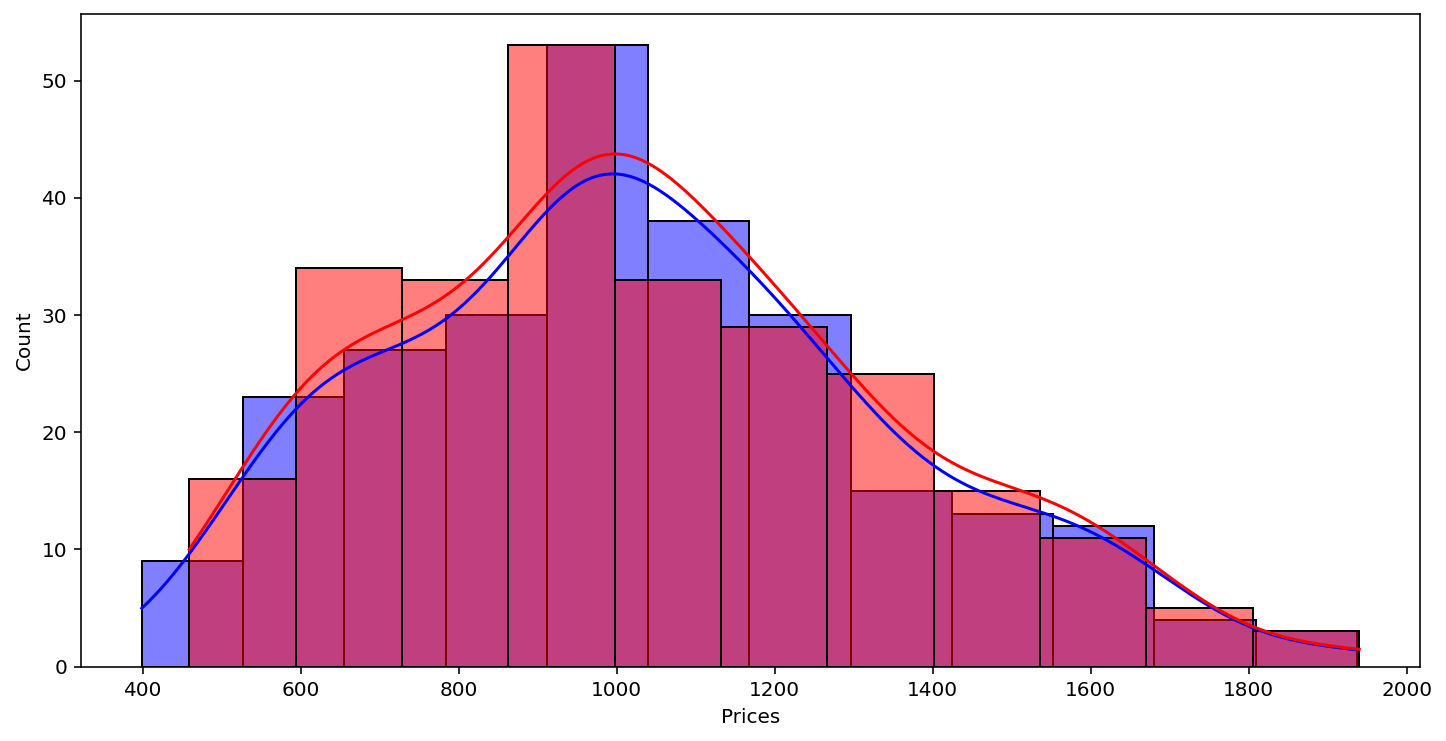

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [110]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8.182879377431954
Mean Squared Error:  638.9455252918287
Root Mean Squared Error:  25.277371803489157


In [111]:
mae_3 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_3 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_3 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## RandomForestRegressor

In [112]:
%%time
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 484 ms
Wall time: 2.62 s


RandomForestRegressor()

In [113]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual  Predicted
1363   633.00   631.7700
33    1231.00  1245.6600
108    754.00   753.8700
704   1191.00  1177.5824
1544  1624.00  1612.8600
2     1595.00  1594.8200
341    694.00   692.1900
1174  1276.37  1276.3700
1601  1092.45  1092.4500
1229  1651.00  1645.1100

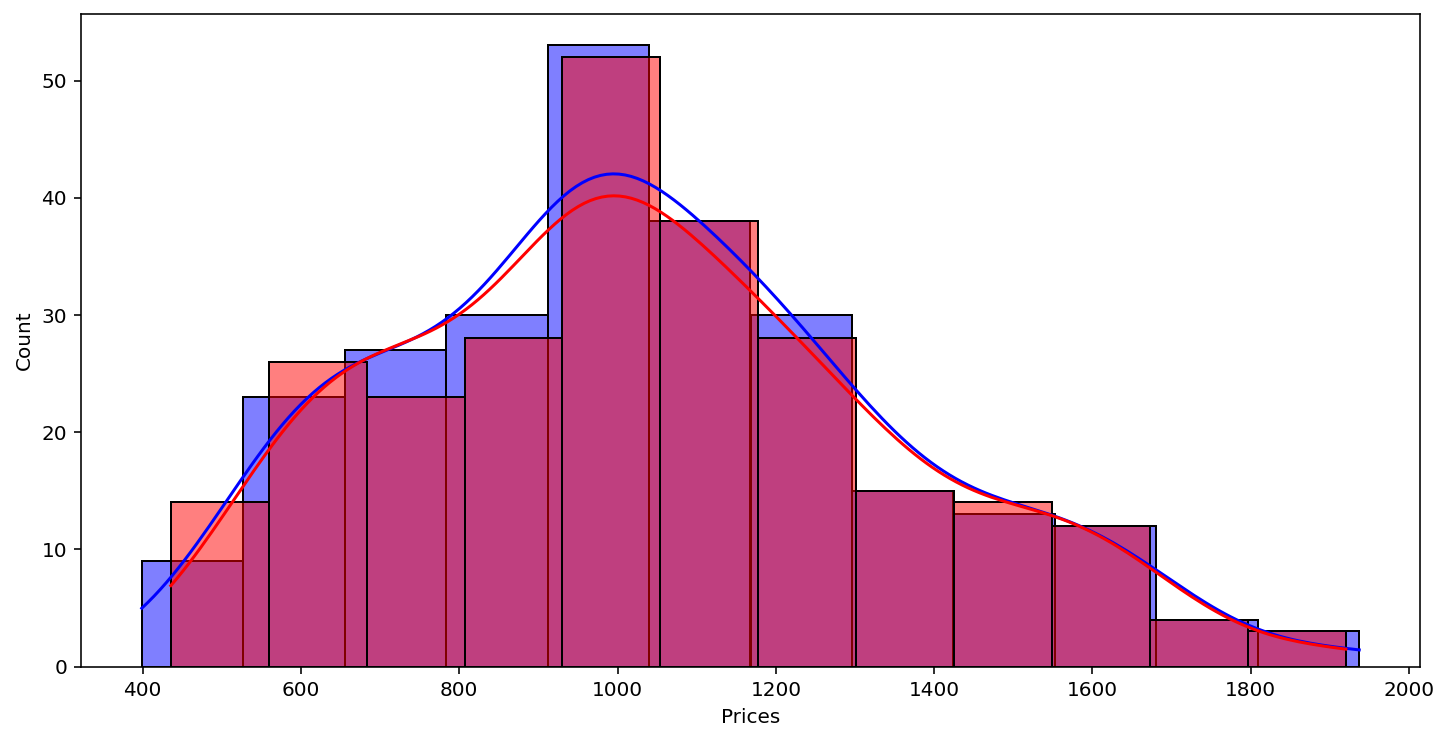

In [114]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [115]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8.080978988327198
Mean Squared Error:  708.22957963323
Root Mean Squared Error:  26.61258310711739


In [116]:
mae_4 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_4 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_4 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## VotingRegressor

In [117]:
%%time
from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor([('lr', regressor), ('rf', regressor), ('r3', regressor)])
regressor.fit(X_train_transformed, y_train)

CPU times: total: 984 ms
Wall time: 1.03 s


VotingRegressor(estimators=[('lr', RandomForestRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('r3', RandomForestRegressor())])

In [118]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual    Predicted
1363   633.00   631.340000
33    1231.00  1243.038167
108    754.00   753.266667
704   1191.00  1183.058967
1544  1624.00  1614.456667
2     1595.00  1595.833333
341    694.00   692.350000
1174  1276.37  1276.370000
1601  1092.45  1092.450000
1229  1651.00  1647.336667

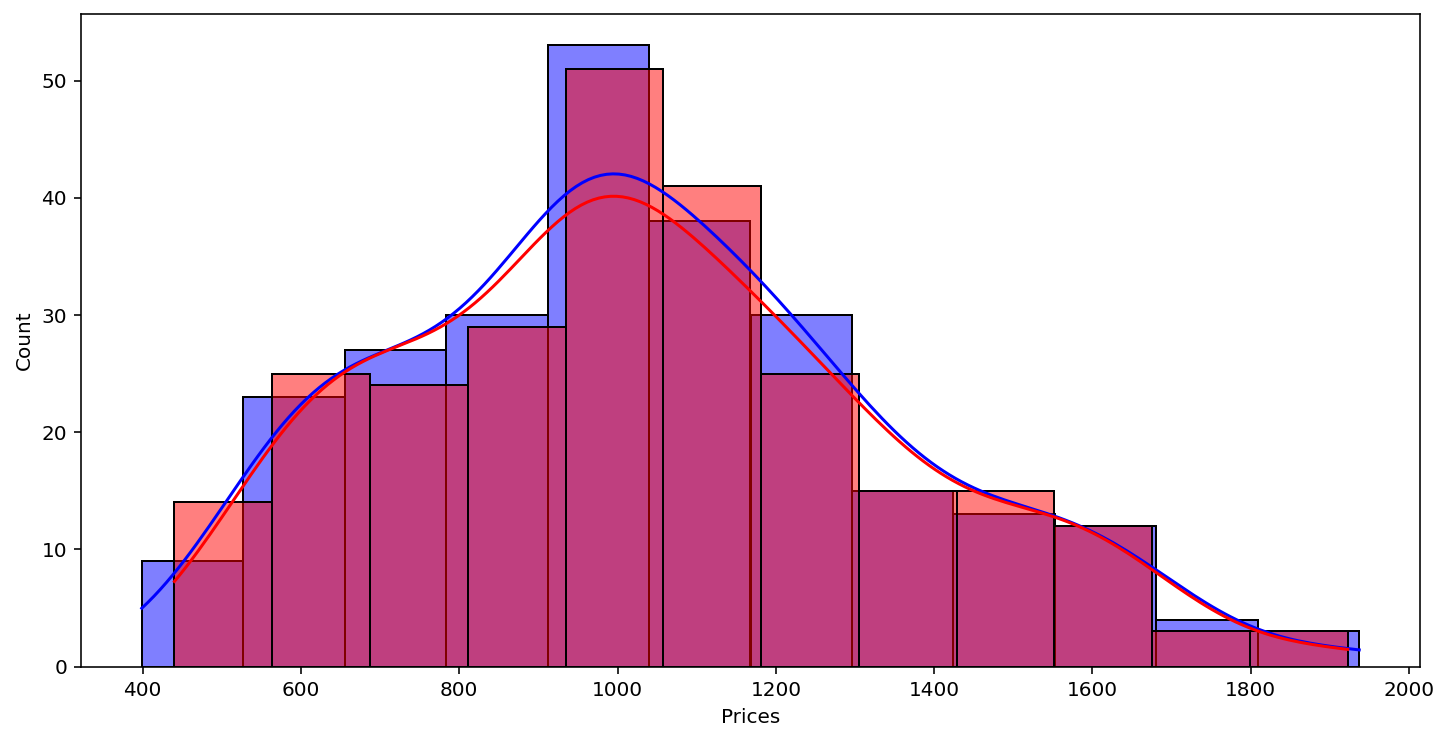

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [120]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  7.862124383917284
Mean Squared Error:  663.1905164844229
Root Mean Squared Error:  25.75248563701032


In [121]:
mae_5 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_5 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_5 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## GradientBoostingRegressor

In [122]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 93.8 ms
Wall time: 232 ms


GradientBoostingRegressor()

In [123]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual    Predicted
1363   633.00   622.848613
33    1231.00  1206.982113
108    754.00   755.762739
704   1191.00  1201.668230
1544  1624.00  1620.051088
2     1595.00  1589.786745
341    694.00   680.404222
1174  1276.37  1271.116818
1601  1092.45  1098.254544
1229  1651.00  1637.806652

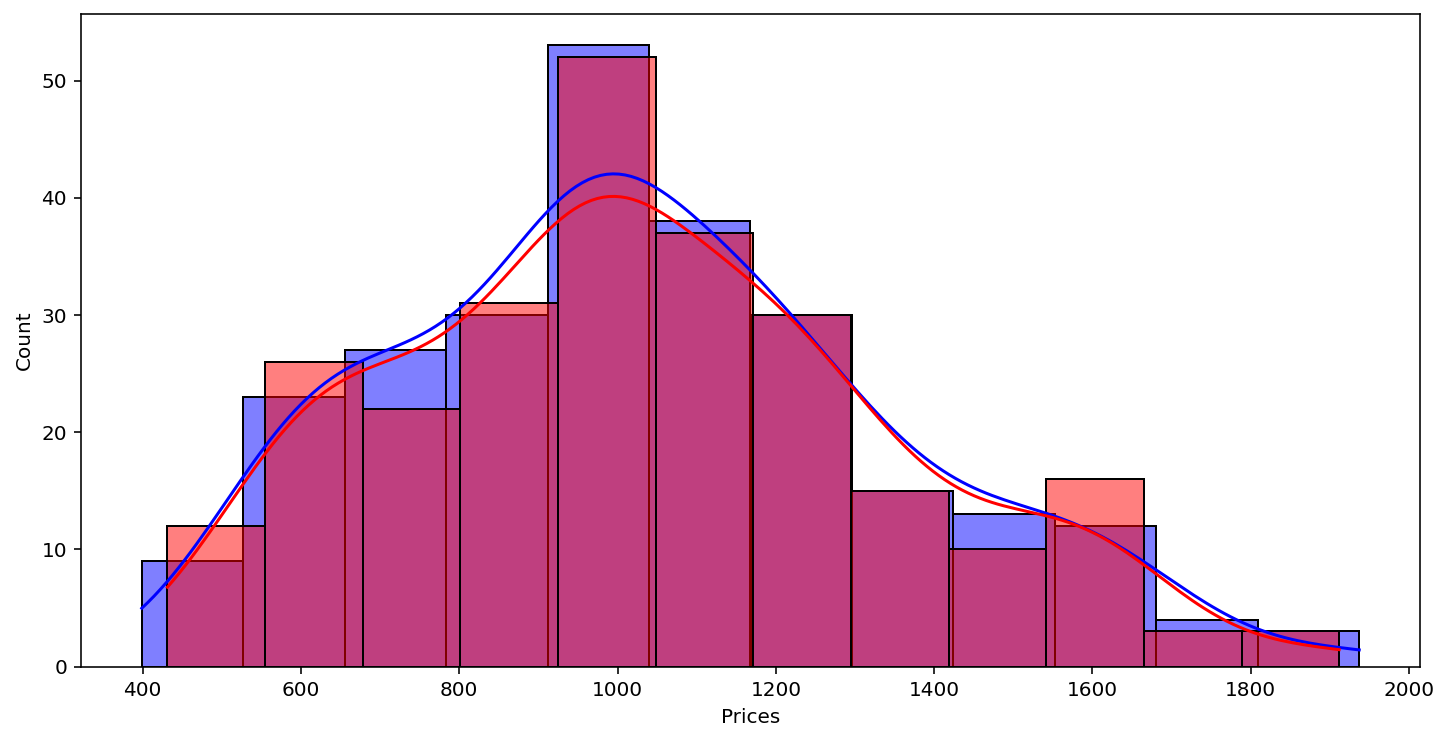

In [124]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [125]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  11.022148852477999
Mean Squared Error:  257.45409715427456
Root Mean Squared Error:  16.04537619235755


In [126]:
mae_6 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_6 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_6 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## AdaBoostRegressor

In [127]:
%%time
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 203 ms
Wall time: 466 ms


AdaBoostRegressor()

In [128]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual    Predicted
1363   633.00   567.192771
33    1231.00  1246.588639
108    754.00   800.360279
704   1191.00  1127.323355
1544  1624.00  1562.125000
2     1595.00  1546.475610
341    694.00   710.119048
1174  1276.37  1248.003824
1601  1092.45  1169.715169
1229  1651.00  1546.475610

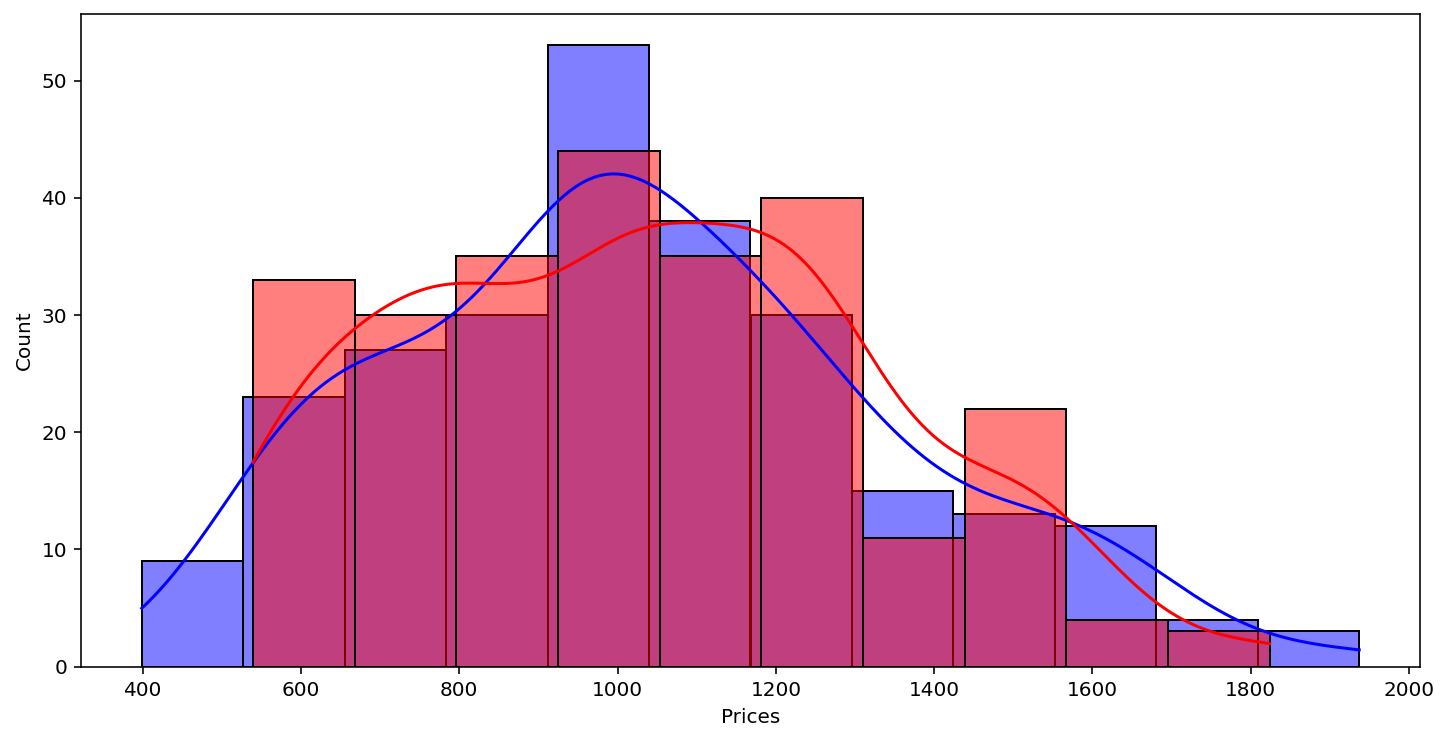

In [129]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [130]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  47.323232857161095
Mean Squared Error:  3670.8466142825964
Root Mean Squared Error:  60.587512032452665


In [131]:
mae_7 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_7 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_7 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## ExtraTreesRegressor

In [132]:
%%time
from sklearn.ensemble import ExtraTreesRegressor

regressor = ExtraTreesRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 312 ms
Wall time: 454 ms


ExtraTreesRegressor()

In [133]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual  Predicted
1363   633.00     633.94
33    1231.00    1231.67
108    754.00     754.07
704   1191.00    1184.22
1544  1624.00    1622.24
2     1595.00    1597.73
341    694.00     694.96
1174  1276.37    1276.37
1601  1092.45    1092.45
1229  1651.00    1643.48

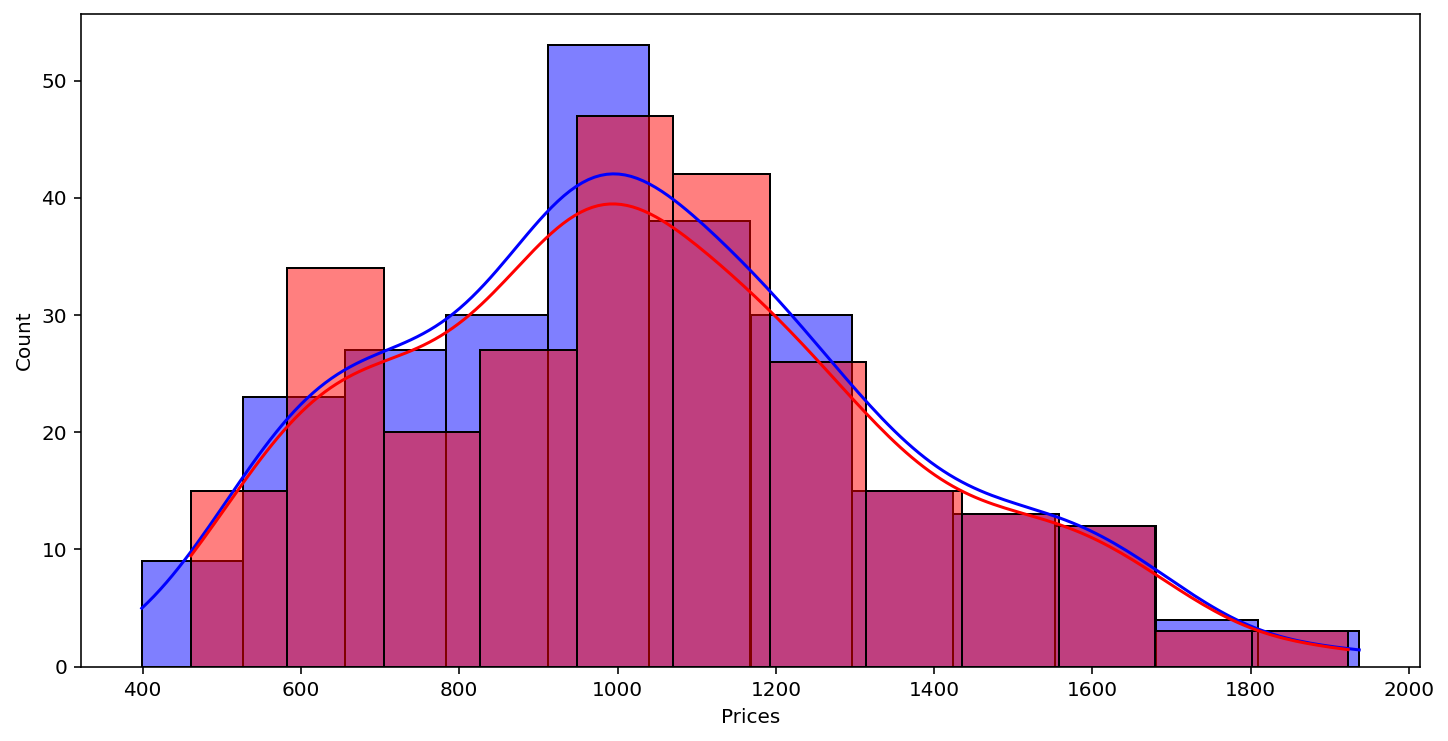

In [134]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [135]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.053865758755289
Mean Squared Error:  127.65123048416343
Root Mean Squared Error:  11.298284404464399


In [136]:
mae_8 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_8 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_8 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

## SVR

In [138]:
%%time
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 46.9 ms
Wall time: 69.4 ms


SVR()

In [139]:
# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

Actual    Predicted
1363   633.00   940.606218
33    1231.00  1025.326353
108    754.00   953.180788
704   1191.00  1024.068018
1544  1624.00  1087.517359
2     1595.00  1068.156782
341    694.00   946.215303
1174  1276.37  1050.868638
1601  1092.45  1034.675391
1229  1651.00  1028.160893

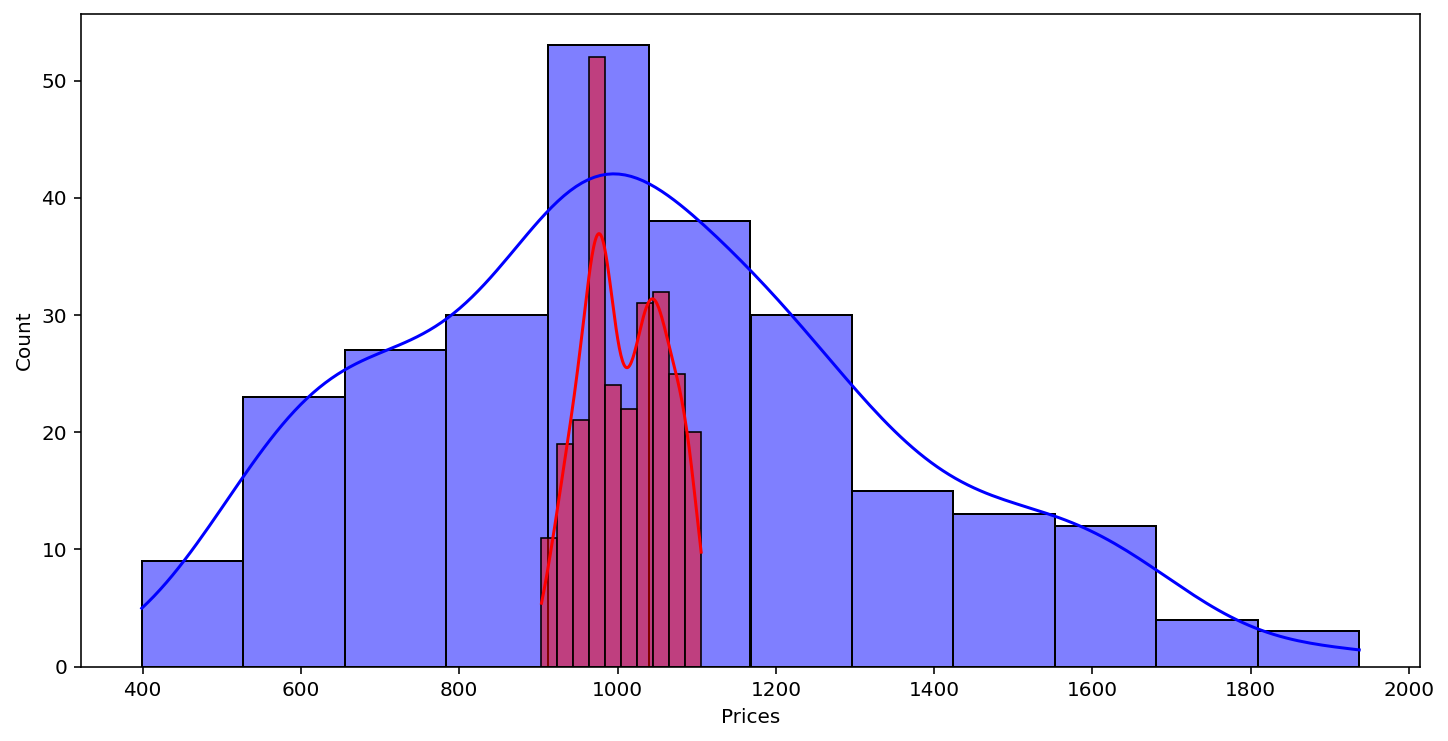

In [140]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [141]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  206.1908335670821
Mean Squared Error:  72533.23832757962
Root Mean Squared Error:  269.31995530888463


In [142]:
mae_9 = metrics.mean_absolute_error(y_test, y_test_pred)

mse_9 = metrics.mean_squared_error(y_test, y_test_pred)

rmse_9 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [145]:
MAE = [mae_1, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7, mae_8, mae_9]
MAE

[43.53695719844358,
 25.954358119429276,
 8.182879377431954,
 8.080978988327198,
 7.862124383917284,
 11.022148852477999,
 47.323232857161095,
 4.053865758755289,
 206.1908335670821]

In [151]:
MSE = [mse_1, mse_2, mse_3, mse_4, mse_5, mse_6, mse_7, mse_8, mse_9]
MSE

[5774.836836280157,
 1484.437038636365,
 638.9455252918287,
 708.22957963323,
 663.1905164844229,
 257.45409715427456,
 3670.8466142825964,
 127.65123048416343,
 72533.23832757962]

In [157]:
RMSE = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9]
RMSE

[75.99234722181015,
 38.52839262980439,
 25.277371803489157,
 26.61258310711739,
 25.75248563701032,
 16.04537619235755,
 60.587512032452665,
 11.298284404464399,
 269.31995530888463]

In [158]:
df = {'Regression_algorithm':['KNeighborsRegressor','LinearRegression','DecisionTreeRegressor',
                        'RandomForestRegressor','VotingRegressor','GradientBoostingRegressor',
                       'AdaBoostRegressor','ExtraTreesRegressor','SVR'],
      'Mean_absolute_error': [43.53,25.95,8.18,8.08,7.86,11.02,47.32,4.05,206.19],
      'Mean_squred_error': [5774.83, 1484.43, 638.94, 708.22, 663.19, 257.45, 3670.84, 127.65, 72533.23],
      'Root_Mean_Squared_Error': [75.99, 38.52, 25.27, 26.61, 25.75, 16.04, 60.58, 11.29, 269.31]}
 
Result = pd.DataFrame(df, columns = ['Regression_algorithm','Mean_absolute_error','Mean_squred_error','Root_Mean_Squared_Error'])
Result.sort_values(by = 'Mean_absolute_error', ascending= True)

Regression_algorithm  Mean_absolute_error  Mean_squred_error  \
7        ExtraTreesRegressor                 4.05             127.65   
4            VotingRegressor                 7.86             663.19   
3      RandomForestRegressor                 8.08             708.22   
2      DecisionTreeRegressor                 8.18             638.94   
5  GradientBoostingRegressor                11.02             257.45   
1           LinearRegression                25.95            1484.43   
0        KNeighborsRegressor                43.53            5774.83   
6          AdaBoostRegressor                47.32            3670.84   
8                        SVR               206.19           72533.23   

   Root_Mean_Squared_Error  
7                    11.29  
4                    25.75  
3                    26.61  
2                    25.27  
5                    16.04  
1                    38.52  
0                    75.99  
6                    60.58  
8                   269.31

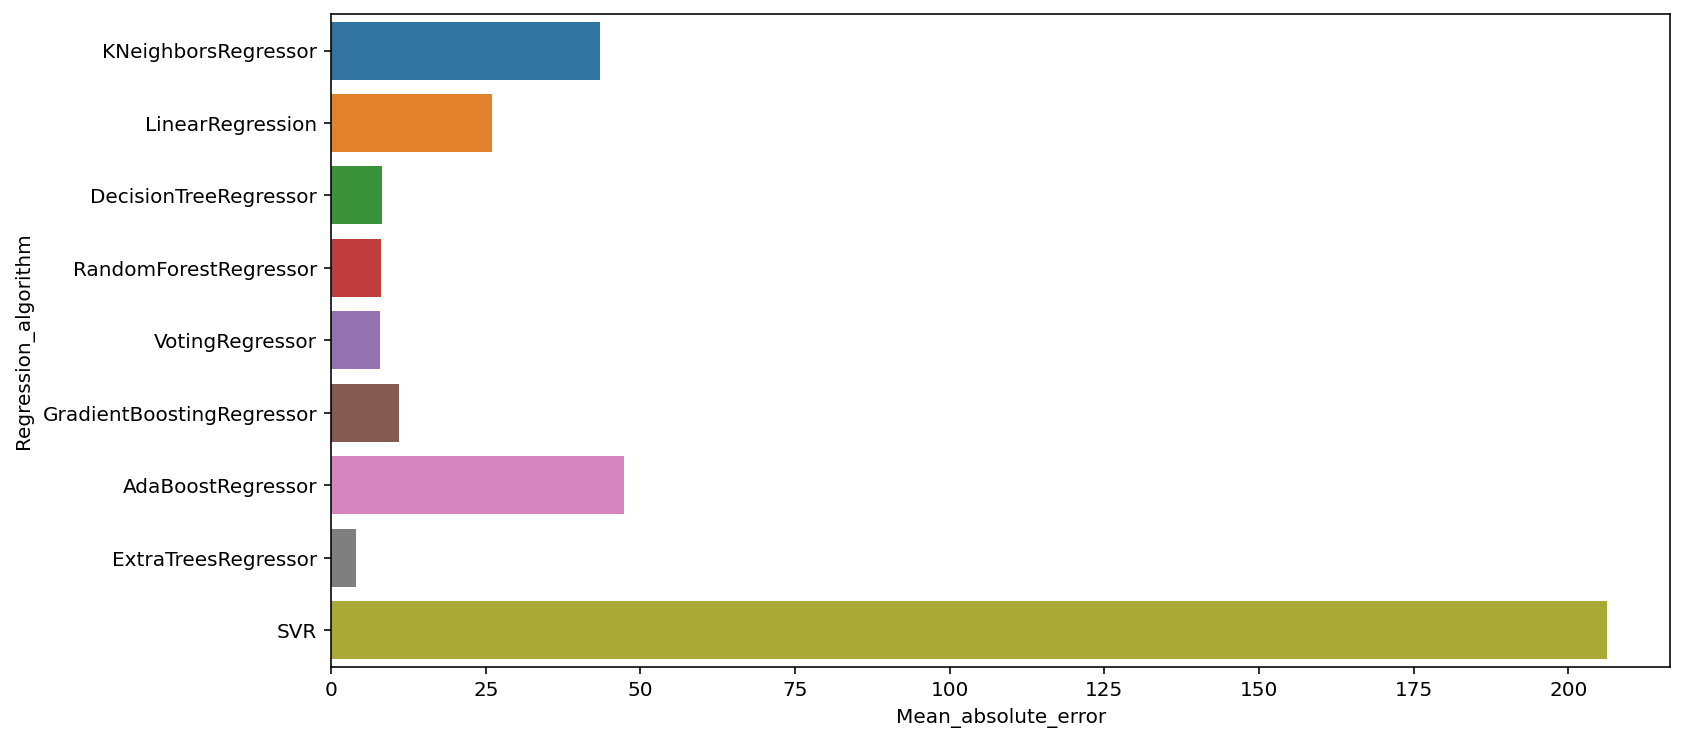

In [161]:
plt.figure(figsize = (12,6))
sns.barplot(y = Result['Regression_algorithm'], x = Result['Mean_absolute_error']);

##  # Conclusion :

- (1).  We achieved the lowest Mean_absolute_error about **`4.05`** for `ExtraTreesRegressor`. 
- (2).  Furthermore, came into the conclusion that the best algorithm to predict hotel prices is **`ExtraTreesRegressor`**.